<a href="https://colab.research.google.com/github/sreejit-chatterjee/COVID-Pattern-Detector/blob/main/Copy_of_LSTM_Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
 
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
#from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

In [ ]:
df = pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv')
df.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,NaN
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


In [ ]:
df.isnull().sum()

Date             0
State            0
District         0
Confirmed        0
Recovered        0
Deceased         0
Other            0
Tested       78272
dtype: int64

In [ ]:
df.rename(columns = {'Date': 'date',
                      'State': 'state',
                      'District': 'dist',
                      'Confirmed': 'confirmed',
                      'Recovered': 'recovered',
                      'Deceased': 'deaths',
                      'Other': 'other',
                      'Tested': 'tested'
                    }, inplace = True)
df.drop(columns=['other','tested'],inplace=True)
df.head()

,date,state,dist,confirmed,recovered,deaths
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8


In [ ]:
df['active'] = df['confirmed'] - df['recovered'] - df['deaths']

In [ ]:
top = df[df['date'] == df['date'].max()]
states = top.groupby('state')['confirmed', 'active', 'recovered', 'deaths'].sum().reset_index()
states.head()


,state,confirmed,active,recovered,deaths
0,Andaman and Nicobar Islands,7548,6,7413,129
1,Andhra Pradesh,1987051,18417,1955052,13582
2,Arunachal Pradesh,50793,2488,48054,251
3,Assam,577035,10819,560782,5434
4,Bihar,725326,277,715403,9646


#Total Cases in India

In [ ]:
total_confirmed = states['confirmed'].sum()
print("Total number of confirmed Cases across India: ",total_confirmed)

total_recovered = states['recovered'].sum()
print("Total number of Recovered Cases across India: ",total_recovered)

total_deaths = states['deaths'].sum()
print("Total number of Deseased Cases across India: ",total_deaths)

total_active = total_confirmed - total_deaths - total_recovered
print("Total number of Active Cases across India: ",total_active)

Total number of confirmed Cases across India:  32076986
Total number of Recovered Cases across India:  31252611
Total number of Deseased Cases across India:  429702
Total number of Active Cases across India:  394673


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

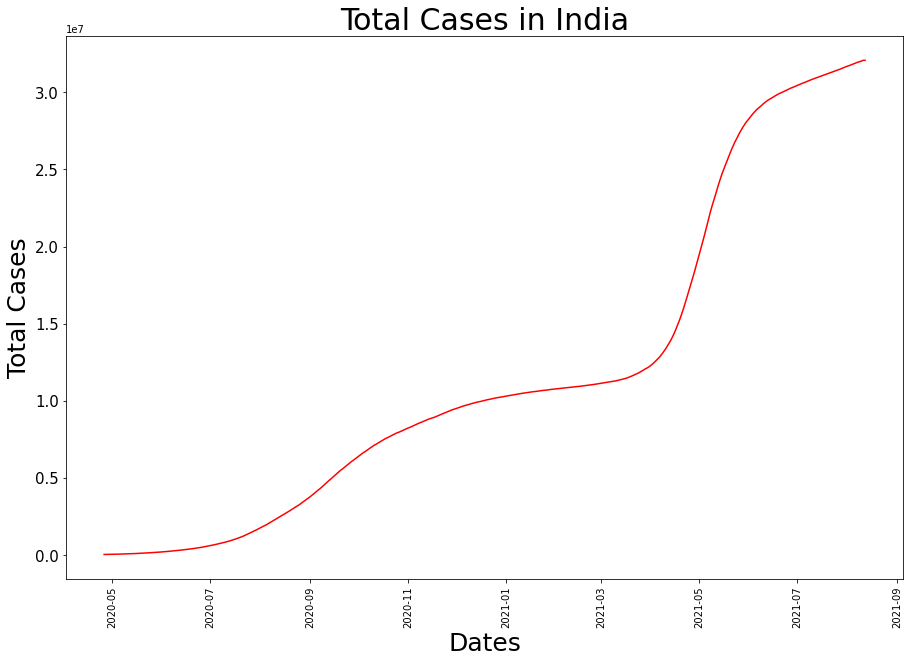

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates", fontsize = 25)
plt.ylabel("Total Cases", fontsize = 25)
plt.title("Total Cases in India", fontsize = 30)
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])
 
ax = sns.lineplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color= "r")
ax.set(xlabel = "Dates", ylabel = "Total Cases")

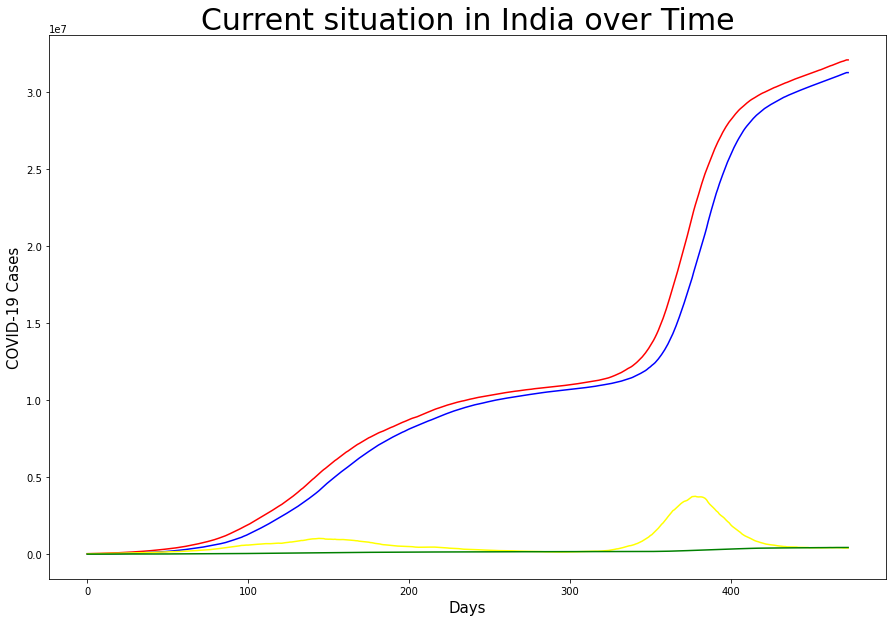

In [ ]:
stats = df.groupby( by = "date")['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
plt.figure(figsize= (15,10))

sns.lineplot(stats.index, stats.confirmed, color="Red")
sns.lineplot(stats.index, stats.recovered, color="Blue")
sns.lineplot(stats.index, stats.active, color="Yellow")
sns.lineplot(stats.index, stats.deaths, color="Green")

plt.title("Current situation in India over Time", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Days", fontsize = 15)
plt.show()

#Comparative Analysis of COVID-19 Cases in India

In [ ]:
top_actives = top.groupby(by = 'state')['active'].sum().sort_values(ascending = False).head(10).reset_index()

[Text(0, 0.5, 'State'), Text(0.5, 0, 'Total Cases')]

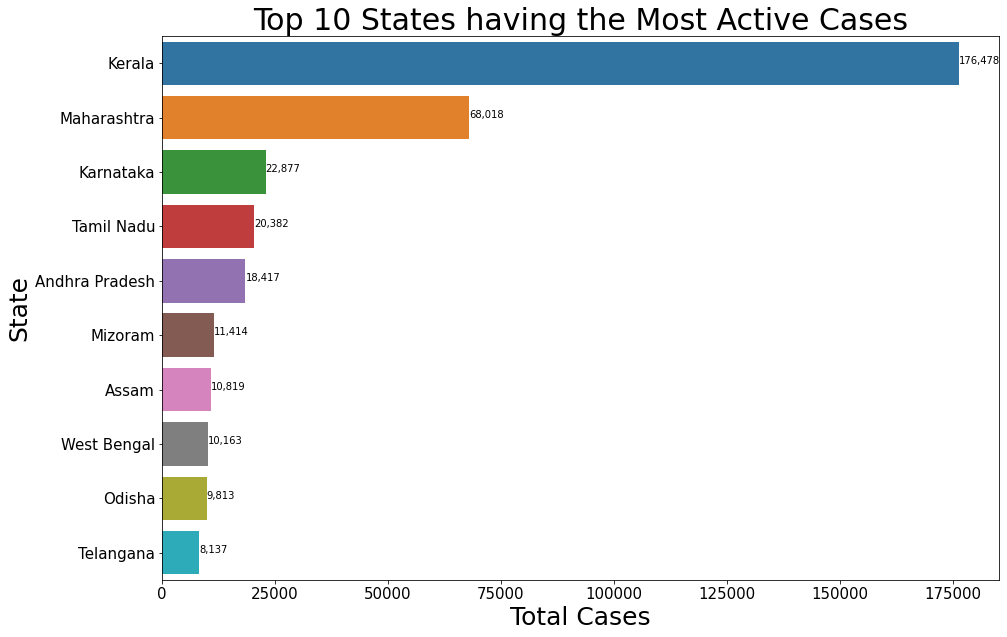

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 25)
plt.ylabel("State", fontsize = 25)
plt.title("Top 10 States having the Most Active Cases", fontsize = 30)

ax = sns.barplot(x = top_actives.active, y = top_actives.state)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.state)):
  ax.text(value, i-0.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

ax.set(xlabel = 'Total Cases', ylabel = 'State')

In [ ]:
top_deaths = top.groupby(by = 'state')['deaths'].sum().sort_values(ascending = False).head(10).reset_index()

[Text(0, 0.5, 'State'), Text(0.5, 0, 'Total Cases')]

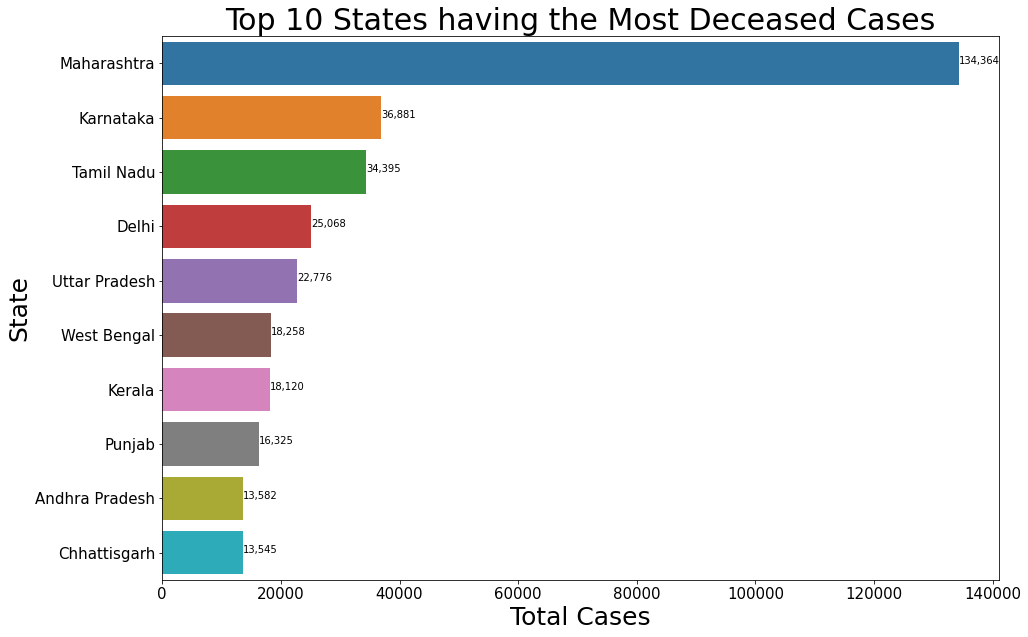

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 25)
plt.ylabel("State", fontsize = 25)
plt.title("Top 10 States having the Most Deceased Cases", fontsize = 30)

ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.state)
for i, (value, name) in enumerate(zip(top_deaths.deaths, top_deaths.state)):
  ax.text(value, i-0.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

ax.set(xlabel = 'Total Cases', ylabel = 'State')

In [ ]:
top_recovered = top.groupby(by = 'state')['recovered'].sum().sort_values(ascending = False).head(10).reset_index()

[Text(0, 0.5, 'State'), Text(0.5, 0, 'Total Cases')]

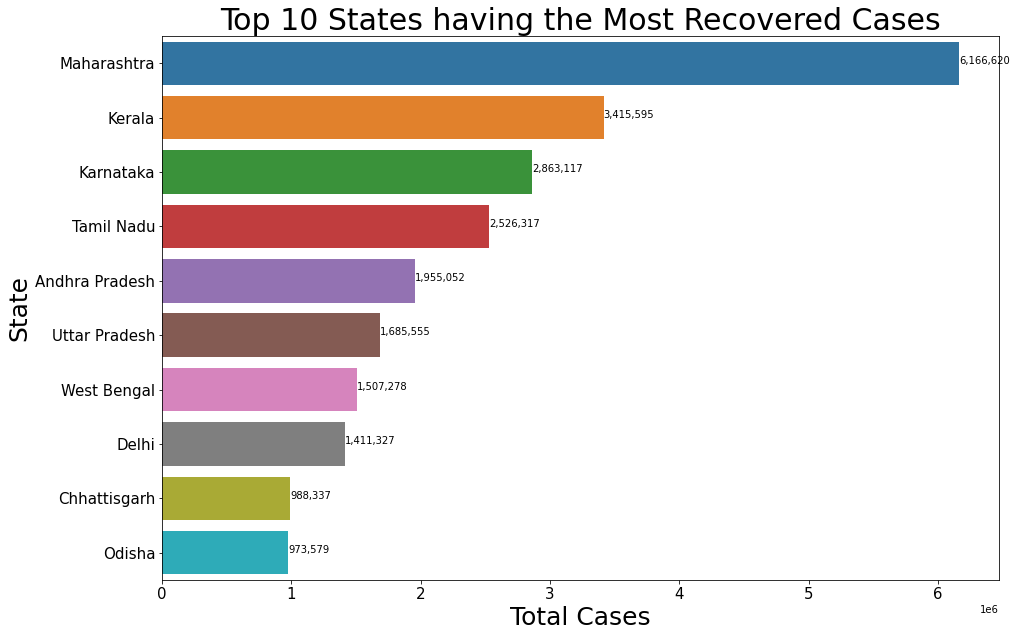

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 25)
plt.ylabel("State", fontsize = 25)
plt.title("Top 10 States having the Most Recovered Cases", fontsize = 30)

ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.state)
for i, (value, name) in enumerate(zip(top_recovered.recovered, top_recovered.state)):
  ax.text(value, i-0.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

ax.set(xlabel = 'Total Cases', ylabel = 'State')

#Comparative Analysis of COVID-19 Cases in Maharashtra

In [ ]:
maha = df[df.state == "Maharashtra"]

In [ ]:
maha_top_actives = maha.groupby(by = 'dist')['active'].sum().sort_values(ascending = False).head(10).reset_index()

[Text(0, 0.5, 'District'), Text(0.5, 0, 'Total Cases')]

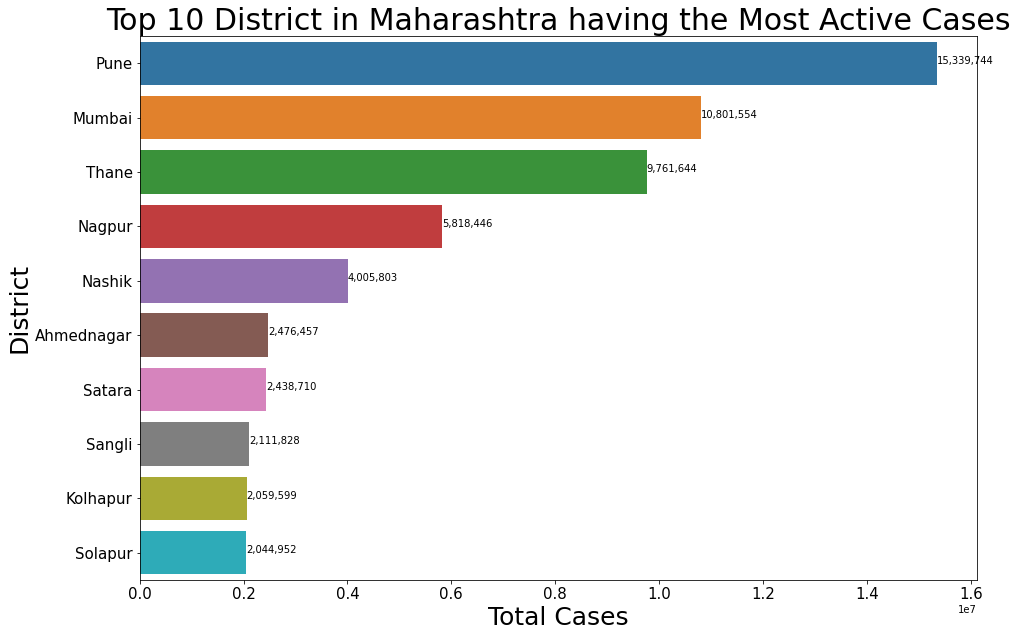

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 25)
plt.ylabel("District", fontsize = 25)
plt.title("Top 10 District in Maharashtra having the Most Active Cases", fontsize = 30)

ax = sns.barplot(x = maha_top_actives.active, y = maha_top_actives.dist)
for i, (value, name) in enumerate(zip(maha_top_actives.active, maha_top_actives.dist)):
  ax.text(value, i-0.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

ax.set(xlabel = 'Total Cases', ylabel = 'District')

In [ ]:
maha_top_recovered = maha.groupby(by = 'dist')['recovered'].sum().sort_values(ascending = False).head(10).reset_index()

[Text(0, 0.5, 'District'), Text(0.5, 0, 'Total Cases')]

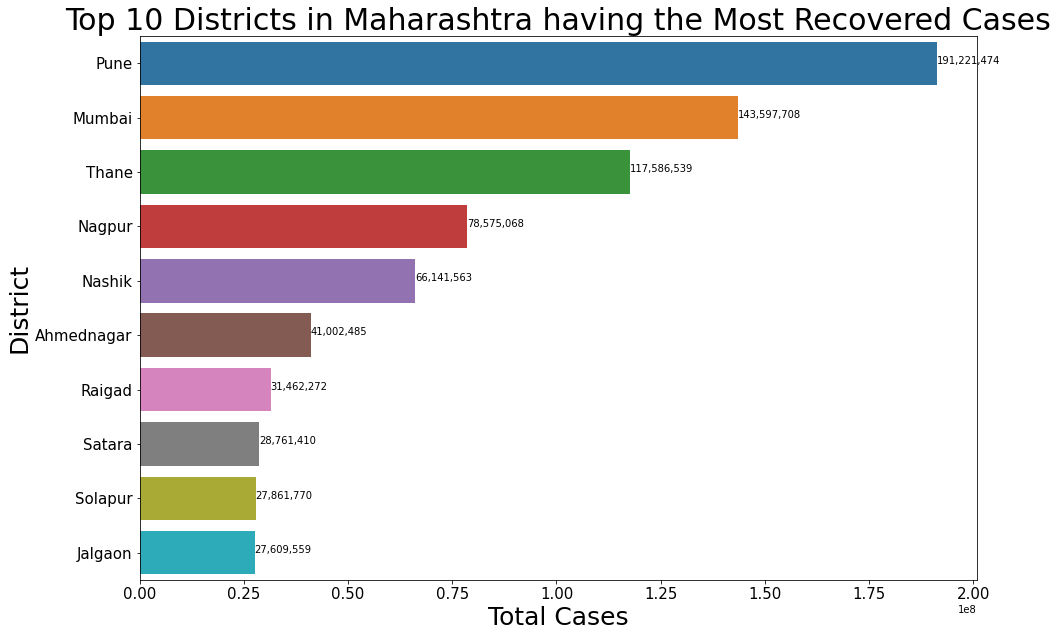

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 25)
plt.ylabel("District", fontsize = 25)
plt.title("Top 10 Districts in Maharashtra having the Most Recovered Cases", fontsize = 30)

ax = sns.barplot(x = maha_top_recovered.recovered, y = maha_top_recovered.dist)
for i, (value, name) in enumerate(zip(maha_top_recovered.recovered, maha_top_recovered.dist)):
  ax.text(value, i-0.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

ax.set(xlabel = 'Total Cases', ylabel = 'District')

In [ ]:
maha_top_deaths = maha.groupby(by = 'dist')['deaths'].sum().sort_values(ascending = False).head(10).reset_index()

[Text(0, 0.5, 'District'), Text(0.5, 0, 'Total Cases')]

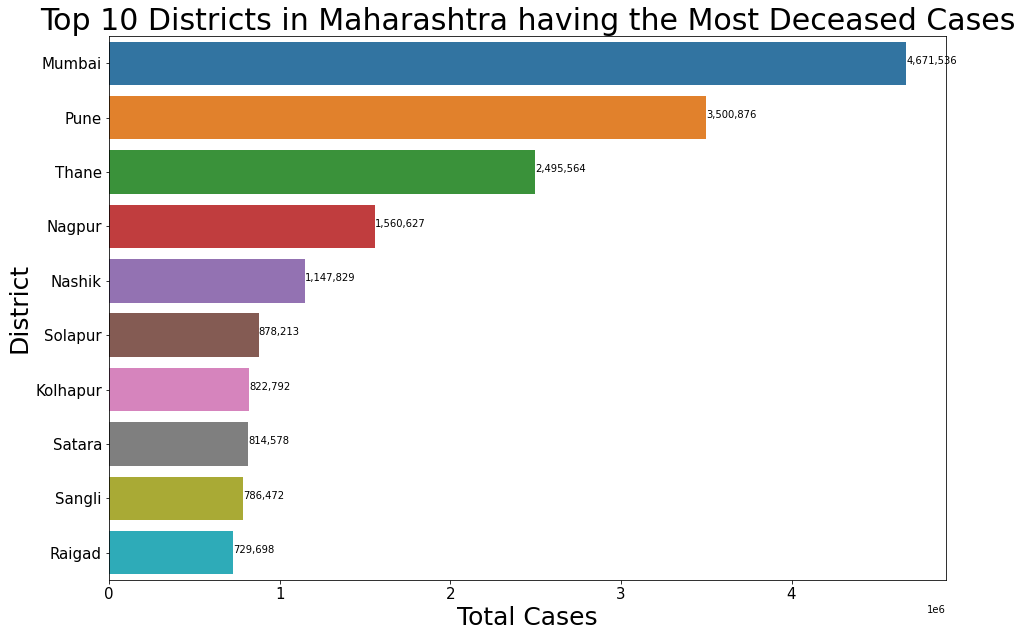

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 25)
plt.ylabel("District", fontsize = 25)
plt.title("Top 10 Districts in Maharashtra having the Most Deceased Cases", fontsize = 30)

ax = sns.barplot(x = maha_top_deaths.deaths, y = maha_top_deaths.dist)
for i, (value, name) in enumerate(zip(maha_top_deaths.deaths, maha_top_deaths.dist)):
  ax.text(value, i-0.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

ax.set(xlabel = 'Total Cases', ylabel = 'District')

In [ ]:
district = maha.groupby('dist')['date','dist','confirmed', 'active', 'recovered', 'deaths']
district.head()


,date,dist,confirmed,active,recovered,deaths
165,2020-04-26,Ahmednagar,36,12,22,2
166,2020-04-26,Akola,29,21,7,1
167,2020-04-26,Amravati,20,15,4,1
168,2020-04-26,Aurangabad,50,23,22,5
169,2020-04-26,Beed,1,0,1,0
...,...,...,...,...,...,...
11771,2020-05-20,Gadchiroli,6,6,0,0
12355,2020-05-21,Gadchiroli,7,7,0,0
12940,2020-05-22,Gadchiroli,9,9,0,0
13526,2020-05-23,Gadchiroli,13,13,0,0


#Situation in the Chosen District

In [ ]:
s = ['Mumbai']
stats = maha[maha['dist'].isin(s)]
stats.drop(columns=['state','dist'],inplace=True)
stats.head()

,date,confirmed,recovered,deaths,active
179,2020-04-26,5407,641,204,4562
595,2020-04-27,5776,711,219,4846
1019,2020-04-28,6169,798,244,5127
1448,2020-04-29,6644,936,270,5438
1881,2020-04-30,7061,1092,290,5679


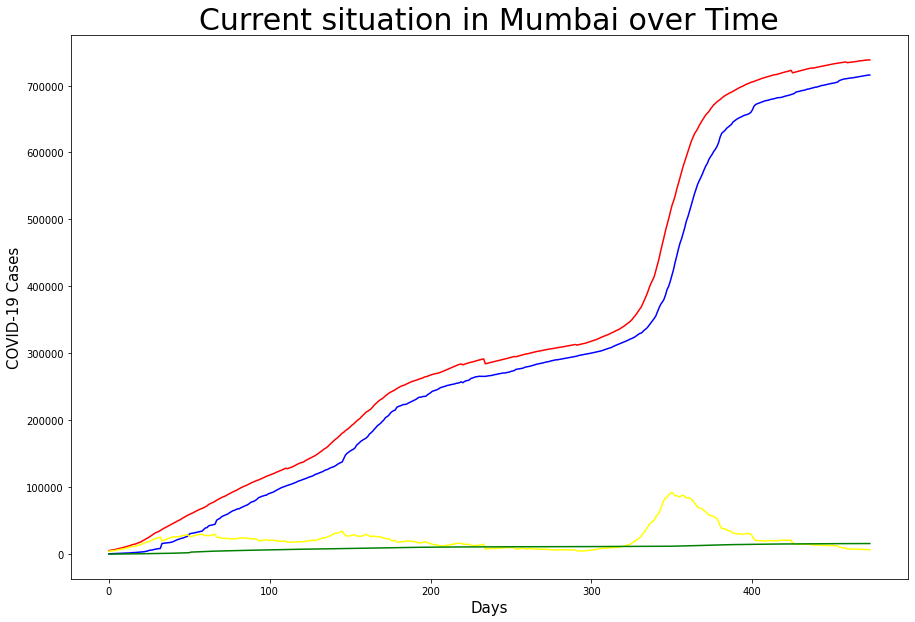

In [ ]:
stats = stats.groupby( by = "date")['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
plt.figure(figsize= (15,10))

sns.lineplot(stats.index, stats.confirmed, color="Red")
sns.lineplot(stats.index, stats.recovered, color="Blue")
sns.lineplot(stats.index, stats.active, color="Yellow")
sns.lineplot(stats.index, stats.deaths, color="Green")

plt.title("Current situation in Mumbai over Time", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Days", fontsize = 15)
plt.show()

In [ ]:
top = stats[stats['date'] == stats['date'].max()]


m_total_confirmed = top['confirmed'].sum()
print("Total number of confirmed Cases across Mumbai: ",m_total_confirmed)

m_total_recovered = top['recovered'].sum()
print("Total number of Recovered Cases across Mumbai: ",m_total_recovered)

m_total_deaths = top['deaths'].sum()
print("Total number of Deseased Cases across Mumbai: ",m_total_deaths)

m_total_active = m_total_confirmed - m_total_deaths - m_total_recovered
print("Total number of Active Cases across Mumbai: ",m_total_active)

Total number of confirmed Cases across Mumbai:  738239
Total number of Recovered Cases across Mumbai:  715650
Total number of Deseased Cases across Mumbai:  15968
Total number of Active Cases across Mumbai:  6621


In [ ]:
datewise = stats.groupby(['date']).agg({"active":"sum","confirmed":"sum","recovered":"sum","deaths":"sum"})

Average increase in number of Confirmed cases everyday: 1546.0
Average increase in number of Recovered cases everyday: 1508.0
Average increase in number of active cases everyday: 4.0


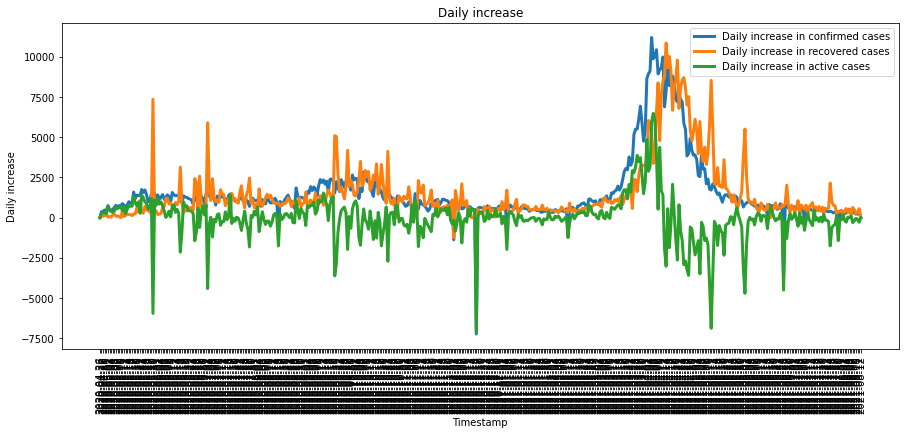

In [ ]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["recovered"].diff().fillna(0).mean()))
print("Average increase in number of active cases everyday:",np.round(datewise["active"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["active"].diff().fillna(0),label="Daily increase in active cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

#Prediction of Active Cases

In [ ]:
active = stats.copy()
active.drop(columns=['recovered','confirmed','deaths'],inplace=True)
active.head()

,date,active
0,2020-04-26,4562
1,2020-04-27,4846
2,2020-04-28,5127
3,2020-04-29,5438
4,2020-04-30,5679


In [ ]:
active['active'][active['date'] == '2021-04-26']

365    73665
Name: active, dtype: int64

In [ ]:
index = active.index
rows = len(index)
print(rows)

474


In [ ]:
confirmed_cases = list(active['active'])
data = pd.DataFrame(np.empty((0, rows)))
data.columns = list(active['date'])
data.loc[0] = confirmed_cases
data.head()

,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-07-31,2021-08-01,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12
0,4562.0,4846.0,5127.0,5438.0,5679.0,6382.0,6834.0,7227.0,7554.0,7953.0,8608.0,9164.0,9813.0,10508.0,10935.0,11627.0,11878.0,12412.0,13173.0,13891.0,14599.0,15918.0,16848.0,17594.0,18575.0,18849.0,20246.0,21487.0,22471.0,23362.0,23896.0,24513.0,25700.0,19751.0,20851.0,21616.0,22795.0,23635.0,24603.0,25370.0,...,14607.0,14901.0,14553.0,14571.0,13787.0,13590.0,13881.0,13750.0,13435.0,12943.0,13424.0,13265.0,13257.0,13019.0,13046.0,12779.0,12995.0,12834.0,12672.0,12433.0,10680.0,10050.0,9557.0,9156.0,9297.0,7871.0,7785.0,7655.0,7853.0,7667.0,7388.0,7428.0,7431.0,7544.0,7235.0,7045.0,7002.0,6905.0,6621.0,6621.0


In [ ]:
dailyCases = data.sum(axis=0)
dailyCases.index = pd.to_datetime(dailyCases.index)
dailyCases.head()

2020-04-26    4562.0
2020-04-27    4846.0
2020-04-28    5127.0
2020-04-29    5438.0
2020-04-30    5679.0
dtype: float64

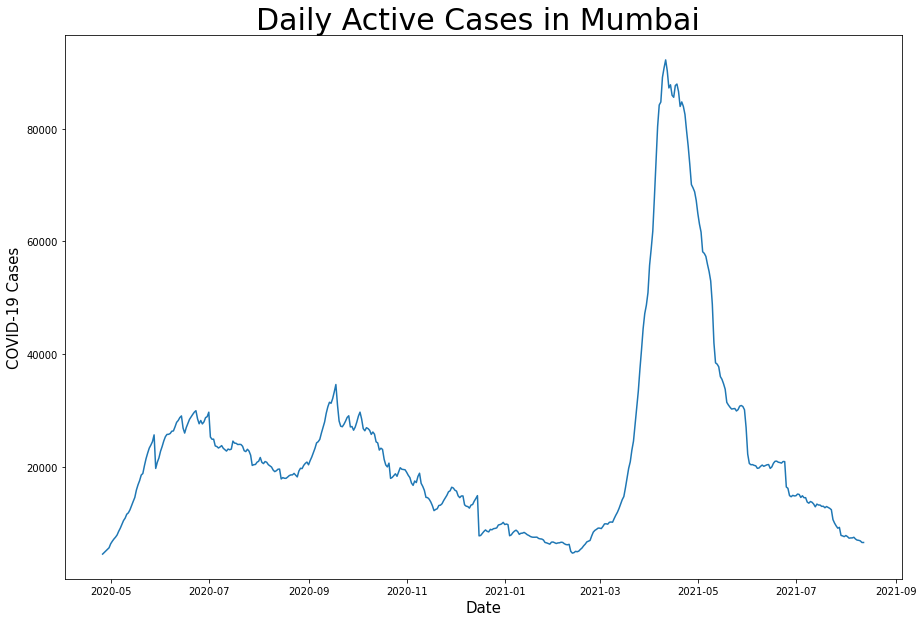

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(dailyCases)
plt.title("Daily Active Cases in Mumbai ", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.show()

In [ ]:
dailyCases.shape

(474,)

#Preprocessing of the Active Cases Data

In [ ]:
testDataSize = 30

trainData = dailyCases[:-testDataSize]
testData = dailyCases[-testDataSize:]

In [ ]:
print("Shape of test data is ")
testData.shape


Shape of test data is 


(30,)

In [ ]:
print("Shape of train data is ,")
trainData.shape

Shape of train data is ,


(444,)

In [ ]:
scalar = MinMaxScaler()
scalar = scalar.fit(np.expand_dims(trainData, axis = 1))

trainData = scalar.transform(np.expand_dims(trainData, axis = 1))
testData =  scalar.transform(np.expand_dims(testData, axis = 1))

In [ ]:
trainData.shape

(444, 1)

In [ ]:
def createSequence(data, sequenceLen):
  xs = []
  ys = []
  
  for i in range(len(data) - sequenceLen - 1):
    x = data[i: (i + sequenceLen)]
    y = data[i + sequenceLen]
    xs.append(x)
    ys.append(y)

  return np.array(xs), np.array(ys)

In [ ]:
sequenceLen = 5

x_train, y_train = createSequence(trainData, sequenceLen)
x_test, y_test = createSequence(testData, sequenceLen)

In [ ]:
x_train.shape

(438, 5, 1)

In [ ]:
y_train.shape

(438, 1)

In [ ]:
x_train[:2]

array([[[0.        ],
        [0.00324105],
        [0.00644786],
        [0.00999703],
        [0.01274736]],

       [[0.00324105],
        [0.00644786],
        [0.00999703],
        [0.01274736],
        [0.02077009]]])

In [ ]:
y_train[:2]

array([[0.02077009],
       [0.02592838]])

In [ ]:
trainData[:7]

array([[0.        ],
       [0.00324105],
       [0.00644786],
       [0.00999703],
       [0.01274736],
       [0.02077009],
       [0.02592838]])

In [ ]:
x_train  = torch.from_numpy(x_train).float()
y_train  = torch.from_numpy(y_train).float()

x_test  = torch.from_numpy(x_test).float()
y_test  = torch.from_numpy(y_test).float()

#Building the Model

In [ ]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, input_dim, hidden_dim, seq_len, num_layers = 2):
    super(CoronaVirusPredictor, self).__init__()

    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.seq_len = seq_len
    self.num_layers = num_layers

    self.lstm = nn.LSTM(
      input_size = input_dim,
      hidden_size = hidden_dim,
      num_layers = num_layers,
      dropout = 0.5
    )

    self.linear = nn.Linear(in_features= hidden_dim, out_features= 1)
  
  def resetHiddenState(self):
    self.hidden = (
        torch.zeros(self.num_layers, self.seq_len, self.hidden_dim),
        torch.zeros(self.num_layers, self.seq_len, self.hidden_dim)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.hidden_dim)[-1]
    y_pred = self.linear(last_time_step)
    
    return y_pred

In [ ]:
def train_model(model, trainData, trainLabel, testData = None, testLabel = None):
  loss_fn = nn.MSELoss(reduction= 'sum')

  optimiser = optim.Adam(model.parameters(), lr = 1e-3)
  num_epochs = 60

  train_history = np.zeros(num_epochs)
  test_history = np.zeros(num_epochs)

  for t in range(num_epochs):

    model.resetHiddenState()
    y_pred = model(x_train)

    loss = loss_fn(y_pred.float(), y_train)

    if testData is not None:
      with torch.no_grad():
        y_test_pred = model(x_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_history[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_history[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

  return model.eval(), train_history, test_history  

#Training the Model for Active Cases

In [ ]:
model = CoronaVirusPredictor(1, 512, seq_len= sequenceLen, num_layers= 2)

model, train_history, test_history = train_model(model, x_train, y_train, x_test, y_test)  

Epoch 0 train loss: 39.495750427246094 test loss: 0.06626921892166138
Epoch 10 train loss: 18.922651290893555 test loss: 0.6574737429618835
Epoch 20 train loss: 18.919490814208984 test loss: 0.7050470113754272
Epoch 30 train loss: 18.93108367919922 test loss: 1.1339706182479858
Epoch 40 train loss: 18.678251266479492 test loss: 1.051472544670105
Epoch 50 train loss: 18.475393295288086 test loss: 1.3749700784683228


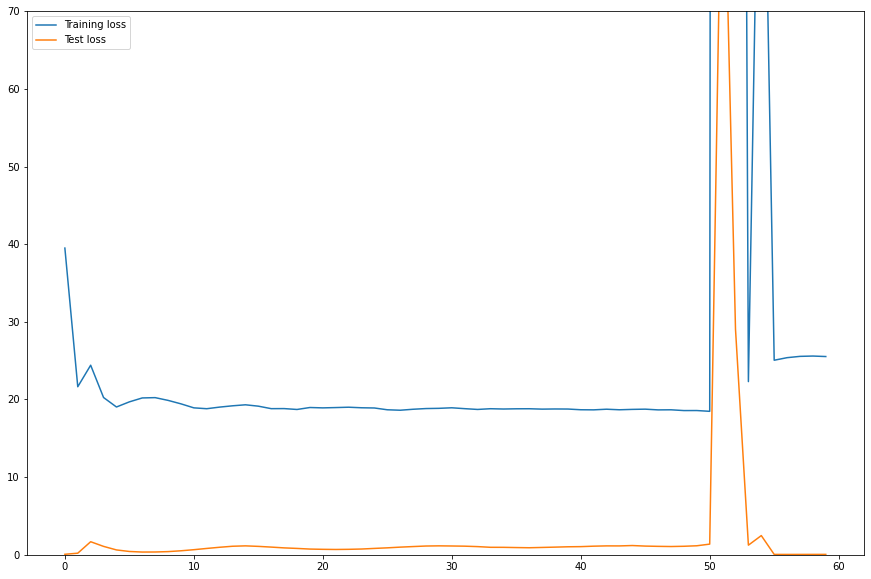

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(train_history, label="Training loss")
plt.plot(test_history, label="Test loss")
plt.ylim(0, 70)
plt.legend();

#Predicting the Number of Active Cases with Real-Time Analysis

In [ ]:
with torch.no_grad():
  test_seq = x_test[:1]
  preds = []
  
  for _ in range(len(x_test)):
    y_test_pred = model(test_seq)
    print(y_test_pred)
    
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    
    print(scalar.inverse_transform(np.expand_dims(preds, axis=0)).flatten())
    
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, sequenceLen, 1).float()

tensor([[0.0911]])
[12548.49887934]
tensor([[0.0918]])
[12548.49887934 12603.15278441]
tensor([[0.0927]])
[12548.49887934 12603.15278441 12683.51910791]
tensor([[0.0937]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511 ]
tensor([[0.0944]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381]
tensor([[0.0947]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381 12859.51768728]
tensor([[0.0948]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381 12859.51768728 12866.22978798]
tensor([[0.0947]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381 12859.51768728 12866.22978798 12863.75934842]
tensor([[0.0947]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381 12859.51768728 12866.22978798 12863.75934842
 12858.19824797]
tensor([[0.0946]])
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381 12859.51768728 12866.22978798 12863.7593

In [ ]:
true_cases = scalar.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

In [ ]:
predicted_cases = scalar.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

[[0.        ]
 [0.00324105]
 [0.00644786]
 [0.00999703]
 [0.01274736]
 [0.02077009]
 [0.02592838]
 [0.03041335]
 [0.03414512]
 [0.03869856]
 [0.04617351]
 [0.05251866]
 [0.05992514]
 [0.06785657]
 [0.07272956]
 [0.08062675]
 [0.0834912 ]
 [0.08958528]
 [0.09826992]
 [0.10646383]
 [0.11454363]
 [0.12959624]
 [0.14020953]
 [0.14872298]
 [0.15991829]
 [0.16304521]
 [0.17898797]
 [0.19315043]
 [0.20437998]
 [0.21454819]
 [0.22064228]
 [0.22768356]
 [0.24122977]
 [0.17333896]
 [0.18589232]
 [0.1946226 ]
 [0.20807751]
 [0.21766371]
 [0.22871066]
 [0.23746377]
 [0.24217698]
 [0.24237099]
 [0.24403716]
 [0.24865907]
 [0.24918403]
 [0.25738936]
 [0.26658754]
 [0.27038778]
 [0.27627645]
 [0.27955173]
 [0.25512976]
 [0.24488166]
 [0.25612261]
 [0.26414534]
 [0.27261315]
 [0.27776003]
 [0.28261018]
 [0.28719786]
 [0.29018784]
 [0.27382284]
 [0.26367745]
 [0.27035355]
 [0.26335791]
 [0.26763746]
 [0.27611668]
 [0.2781138 ]
 [0.2871408 ]
 [0.23688175]
 [0.2323283 ]
 [0.2326022 ]
 [0.21887339]
 [0.21

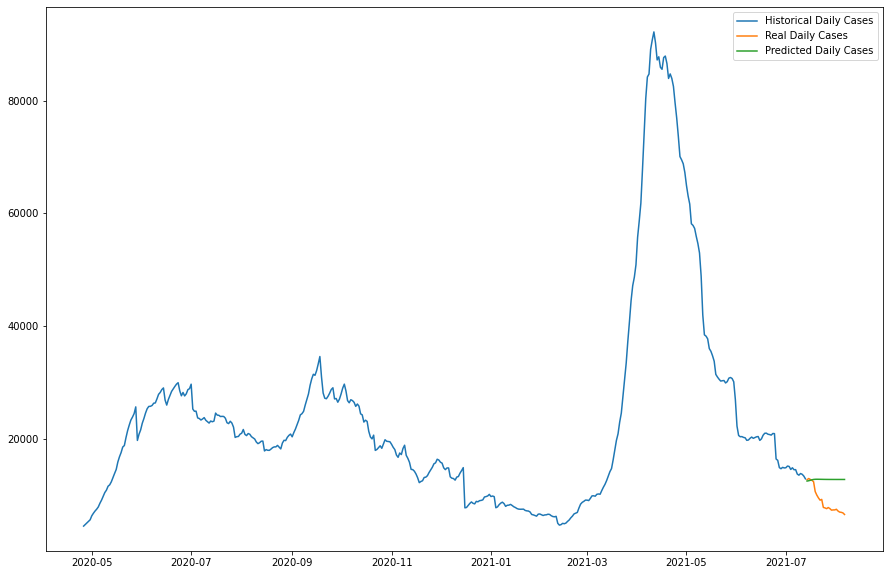

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(
  dailyCases.index[:len(trainData)], 
  scalar.inverse_transform(trainData).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  dailyCases.index[len(trainData):len(trainData) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  dailyCases.index[len(trainData):len(trainData) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)
print(trainData)
print(true_cases)
print(predicted_cases)
plt.legend();

[12779.     12995.     12834.     12672.     12433.     10680.
 10050.      9557.      9156.      9297.      7871.      7785.
  7655.0005  7853.      7667.      7388.0005  7428.      7431.
  7544.0005  7235.      7045.0005  7002.      6905.      6621.    ]
[12548.49887934 12603.15278441 12683.51910791 12772.1402511
 12832.23382381 12859.51768728 12866.22978798 12863.75934842
 12858.19824797 12852.07307252 12846.39967936 12841.6220164
 12837.88567244 12835.14168262 12833.23401234 12831.97528943
 12831.19054621 12830.73092955 12830.48545247 12830.37315977
 12830.33986367 12830.34704518 12830.37185404 12830.40319154]


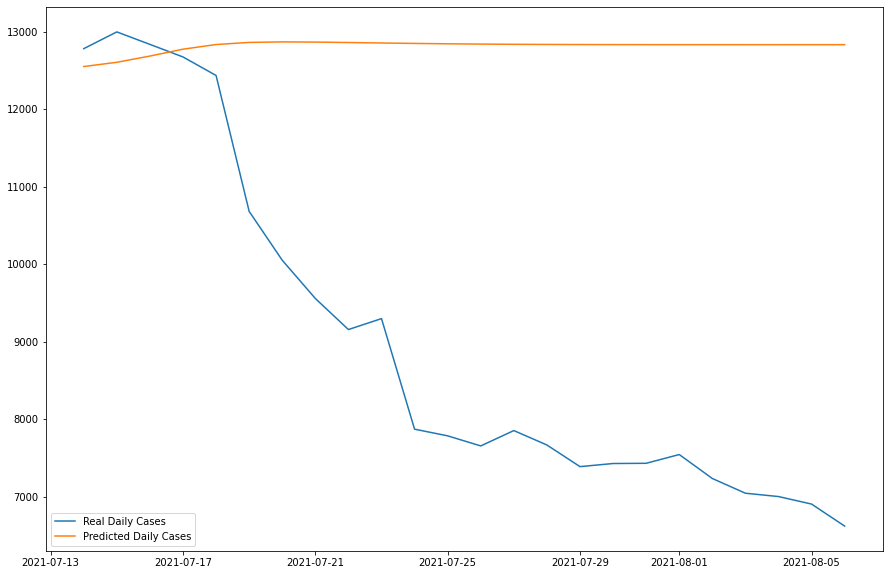

In [ ]:
plt.figure(figsize= (15,10))

plt.plot(
  dailyCases.index[len(trainData):len(trainData) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  dailyCases.index[len(trainData):len(trainData) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)
print(true_cases)
print(predicted_cases)
plt.legend();

#Prediction of Future Active Cases

In [ ]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(dailyCases, axis=1))

all_data = scaler.transform(np.expand_dims(dailyCases, axis=1))

all_data.shape

(474, 1)

In [ ]:
x_all, y_all = createSequence(all_data, sequenceLen)

x_all = torch.from_numpy(x_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(1,512, seq_len=sequenceLen, num_layers=2)
model, train_history, _ = train_model(model, x_all, y_all)

Epoch 0 train loss: 32.249874114990234
Epoch 10 train loss: 19.427623748779297
Epoch 20 train loss: 18.861825942993164
Epoch 30 train loss: 18.77764892578125
Epoch 40 train loss: 18.753082275390625
Epoch 50 train loss: 18.594303131103516


In [ ]:
Days = 10

with torch.no_grad():
  test_seq = x_all[:1]
  preds = []
  for _ in range(Days):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, sequenceLen, 1).float()


In [ ]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [ ]:
dailyCases.index[-1]

Timestamp('2021-08-12 00:00:00')

2021-08-13    14384.028939
2021-08-14    14378.311151
2021-08-15    14597.317184
2021-08-16    14839.614814
2021-08-17    15036.549455
2021-08-18    15185.109442
2021-08-19    15297.616288
2021-08-20    15383.939348
2021-08-21    15450.088240
2021-08-22    15500.212570
Freq: D, dtype: float64


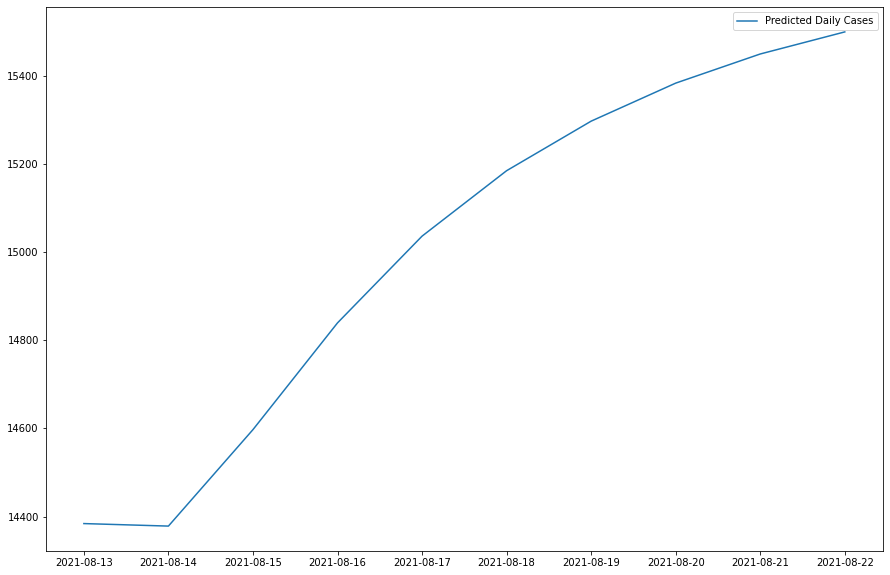

In [ ]:
predicted_index = pd.date_range(
  start=dailyCases.index[-1],
  periods = Days+1,
  closed ='right'
)

predicted_cases = pd.Series(
  data = predicted_cases,
  index = predicted_index
)
plt.figure(figsize= (15,10))
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();
print(predicted_cases)

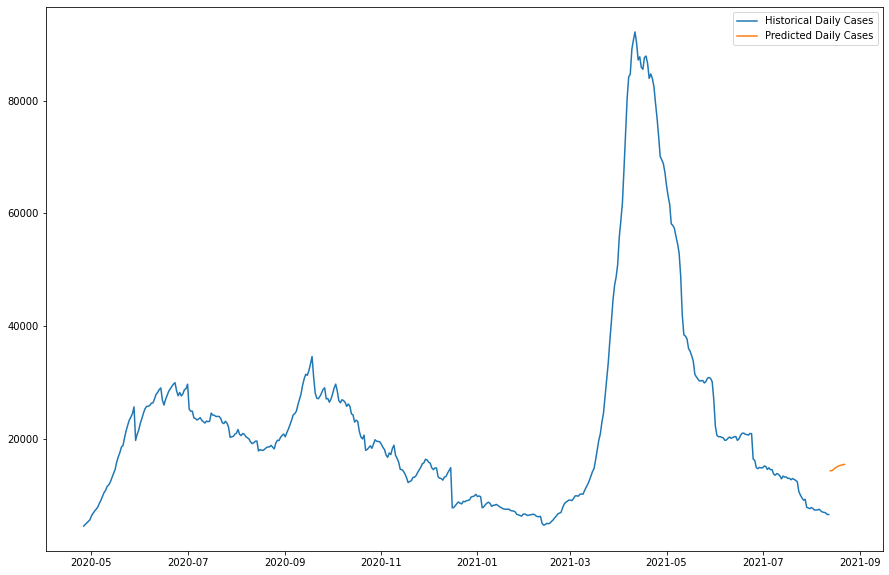

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(dailyCases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

##Death Cases Prediction

In [ ]:
deaths = stats.copy()
deaths.drop(columns=['recovered','confirmed','active'],inplace=True)
deaths.head()

,date,deaths
0,2020-04-26,204
1,2020-04-27,219
2,2020-04-28,244
3,2020-04-29,270
4,2020-04-30,290


In [ ]:
deaths['deaths'][deaths['date'] == '2021-04-26']

365    12861
Name: deaths, dtype: int64

In [ ]:
index = deaths.index
rows = len(index)
print(rows)

474


In [ ]:
deseased_cases = list(deaths['deaths'])
dead = pd.DataFrame(np.empty((0, rows)))
dead.columns = list(deaths['date'])
dead.loc[0] = deseased_cases
dead.head()

,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-07-31,2021-08-01,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12
0,204.0,219.0,244.0,270.0,290.0,296.0,322.0,343.0,361.0,387.0,412.0,437.0,462.0,489.0,508.0,528.0,556.0,596.0,621.0,655.0,696.0,734.0,757.0,800.0,841.0,882.0,909.0,949.0,988.0,1026.0,1065.0,1097.0,1135.0,1173.0,1227.0,1279.0,1319.0,1368.0,1417.0,1465.0,...,15544.0,15554.0,15564.0,15573.0,15586.0,15599.0,15612.0,15627.0,15636.0,15644.0,15654.0,15667.0,15678.0,15690.0,15702.0,15716.0,15787.0,15800.0,15810.0,15818.0,15827.0,15837.0,15845.0,15850.0,15860.0,15873.0,15880.0,15889.0,15899.0,15908.0,15911.0,15920.0,15929.0,15937.0,15942.0,15951.0,15954.0,15959.0,15968.0,15968.0


In [ ]:
deathCases = dead.sum(axis=0)
deathCases.index = pd.to_datetime(deathCases.index)
deathCases.head()

2020-04-26    204.0
2020-04-27    219.0
2020-04-28    244.0
2020-04-29    270.0
2020-04-30    290.0
dtype: float64

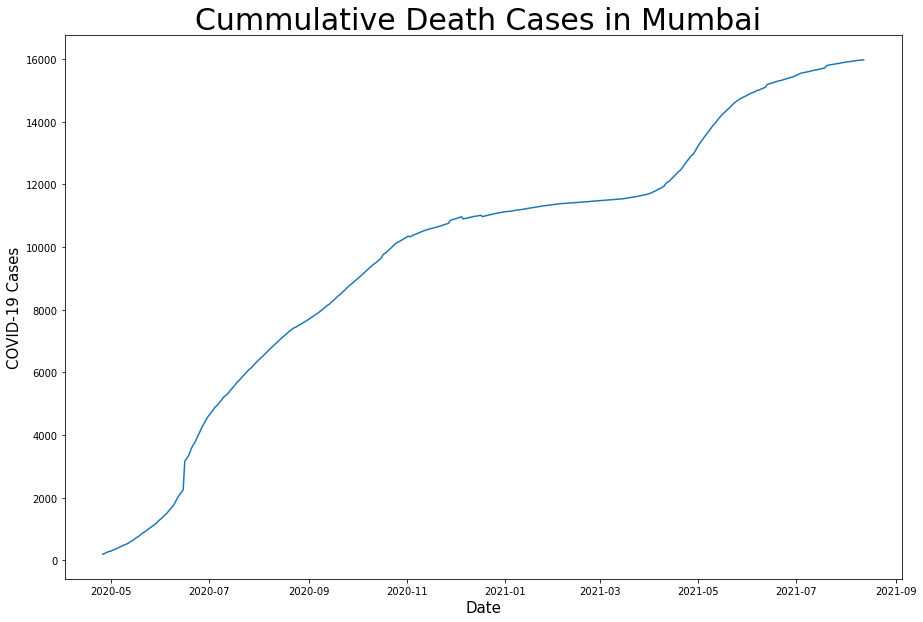

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(deathCases)
plt.title("Cummulative Death Cases in Mumbai ", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.show()

In [ ]:
deathCases = deathCases.diff().fillna(deathCases[0]).astype(np.int64)
deathCases.head()

num = deathCases._get_numeric_data()
num[num < 0] = -num

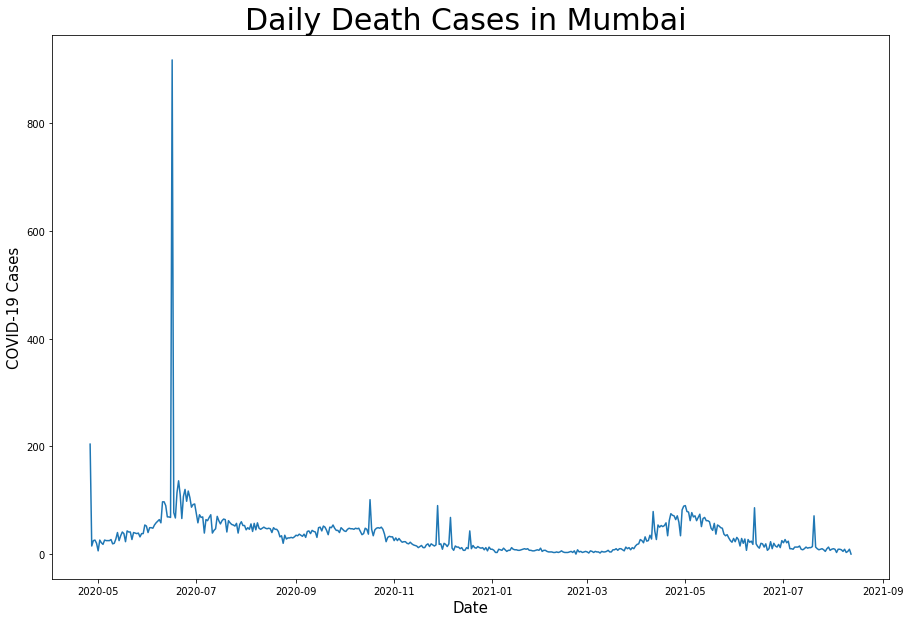

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(deathCases)
plt.title("Daily Death Cases in Mumbai ", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.show()

In [ ]:
deathCases.shape

(474,)

#Preprocessing of Death Cases Data

In [ ]:
d_testDataSize = 30

d_trainData = deathCases[:-d_testDataSize]
d_testData = deathCases[-d_testDataSize:]

In [ ]:
d_scalar = MinMaxScaler()
d_scalar = d_scalar.fit(np.expand_dims(d_trainData, axis = 1))

d_trainData = d_scalar.transform(np.expand_dims(d_trainData, axis = 1))
d_testData =  d_scalar.transform(np.expand_dims(d_testData, axis = 1))

In [ ]:
d_x_train, d_y_train = createSequence(d_trainData, sequenceLen)
d_x_test, d_y_test = createSequence(d_testData, sequenceLen)

In [ ]:
d_x_train  = torch.from_numpy(d_x_train).float()
d_y_train  = torch.from_numpy(d_y_train).float()

d_x_test  = torch.from_numpy(d_x_test).float()
d_y_test  = torch.from_numpy(d_y_test).float()

#Prediction of Death Cases with Real-Time Analysis

In [ ]:
d_model = CoronaVirusPredictor(1, 512, seq_len= sequenceLen, num_layers= 2)

d_model, d_train_history, d_test_history = train_model(d_model, d_x_train, d_y_train, d_x_test, d_y_test)  

Epoch 0 train loss: 41.33740997314453 test loss: 0.08669908344745636
Epoch 10 train loss: 19.055036544799805 test loss: 0.6579049825668335
Epoch 20 train loss: 19.020055770874023 test loss: 0.6553118228912354
Epoch 30 train loss: 18.79445457458496 test loss: 1.114129662513733
Epoch 40 train loss: 18.78697967529297 test loss: 1.1296567916870117
Epoch 50 train loss: 18.699169158935547 test loss: 1.1620514392852783


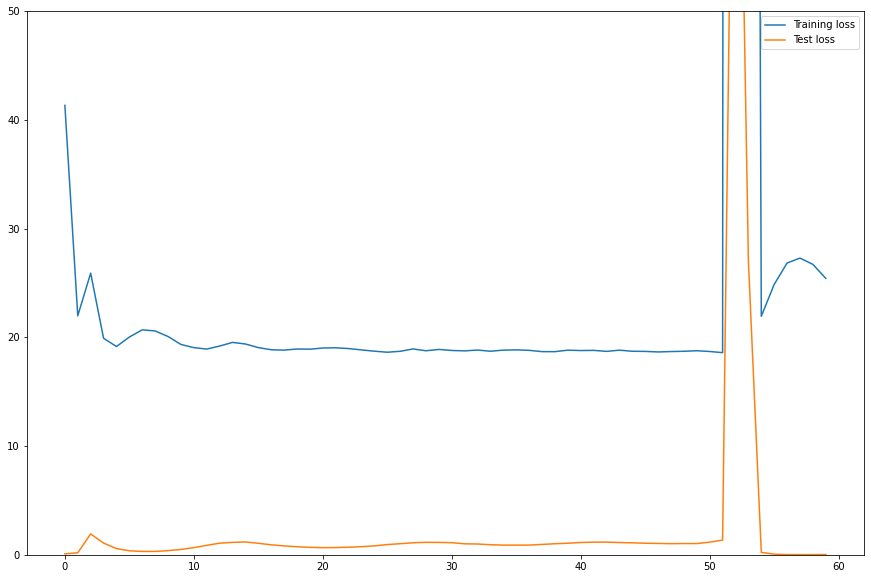

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(d_train_history, label="Training loss")
plt.plot(d_test_history, label="Test loss")
plt.ylim(0, 50)
plt.legend();

In [ ]:
with torch.no_grad():
  d_test_seq = d_x_test[:1]
  d_preds = []
  
  for _ in range(len(d_x_test)):
    d_y_test_pred = d_model(test_seq)
    print(d_y_test_pred)
    
    d_pred = torch.flatten(d_y_test_pred).item()
    d_preds.append(d_pred)
    
    print(d_scalar.inverse_transform(np.expand_dims(d_preds, axis=0)).flatten())
    
    d_new_seq = d_test_seq.numpy().flatten()
    d_new_seq = np.append(d_new_seq, [d_pred])
    d_new_seq = d_new_seq[1:]
    d_test_seq = torch.as_tensor(d_new_seq).view(1, sequenceLen, 1).float()

tensor([[0.0760]])
[69.64937177]
tensor([[0.0793]])
[69.64937177 72.71251243]
tensor([[0.0855]])
[69.64937177 72.71251243 78.4188195 ]
tensor([[0.0911]])
[69.64937177 72.71251243 78.4188195  83.50882272]
tensor([[0.0949]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788]
tensor([[0.0975]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968]
tensor([[0.0991]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968
 90.90409994]
tensor([[0.1003]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968
 90.90409994 91.95053066]
tensor([[0.1010]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968
 90.90409994 91.95053066 92.66213662]
tensor([[0.1016]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968
 90.90409994 91.95053066 92.66213662 93.13053055]
tensor([[0.1019]])
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968
 90.90409994 91.95053066 92.662136

In [ ]:
d_true_cases = d_scalar.inverse_transform(
    np.expand_dims(d_y_test.flatten().numpy(), axis=0)
).flatten()

In [ ]:
d_predicted_cases = d_scalar.inverse_transform(
  np.expand_dims(d_preds, axis=0)
).flatten()

[[0.22246456]
 [0.01635769]
 [0.02726281]
 [0.02835333]
 [0.02181025]
 [0.00654308]
 [0.02835333]
 [0.02290076]
 [0.01962923]
 [0.02835333]
 [0.02726281]
 [0.02726281]
 [0.02726281]
 [0.02944384]
 [0.02071974]
 [0.02181025]
 [0.03053435]
 [0.0436205 ]
 [0.02726281]
 [0.03707743]
 [0.04471101]
 [0.04143948]
 [0.02508179]
 [0.04689204]
 [0.04471101]
 [0.04471101]
 [0.02944384]
 [0.0436205 ]
 [0.04252999]
 [0.04143948]
 [0.04252999]
 [0.0348964 ]
 [0.04143948]
 [0.04143948]
 [0.05888768]
 [0.05670665]
 [0.0436205 ]
 [0.05343511]
 [0.05343511]
 [0.0523446 ]
 [0.05888768]
 [0.06324973]
 [0.06652126]
 [0.0697928 ]
 [0.06324973]
 [0.10577972]
 [0.10577972]
 [0.09814613]
 [0.07524537]
 [0.07524537]
 [0.07415485]
 [1.        ]
 [0.08396947]
 [0.07306434]
 [0.12431843]
 [0.14830971]
 [0.11995638]
 [0.07197383]
 [0.11668484]
 [0.1308615 ]
 [0.10687023]
 [0.12758997]
 [0.11450382]
 [0.09487459]
 [0.10032715]
 [0.10141767]
 [0.08178844]
 [0.06324973]
 [0.07960742]
 [0.07415485]
 [0.07524537]
 [0.04

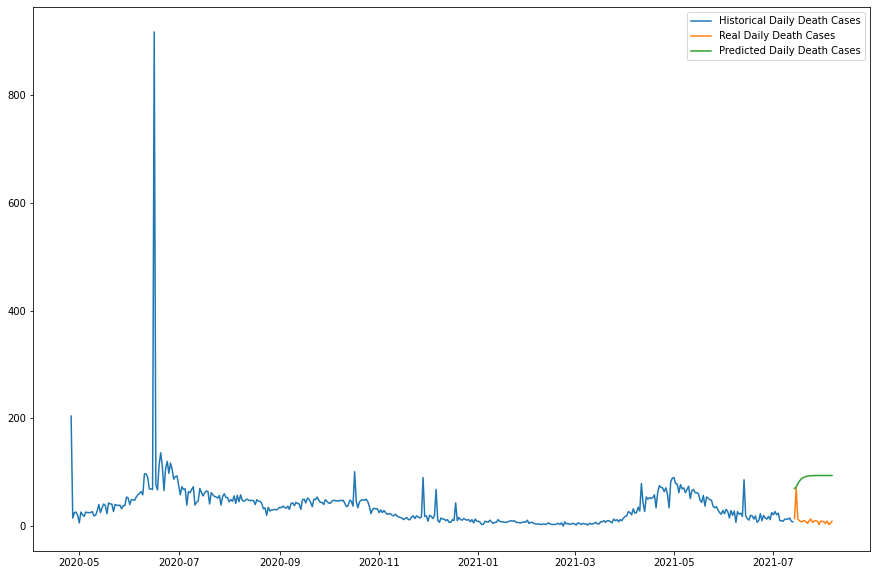

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(
  deathCases.index[:len(d_trainData)], 
  d_scalar.inverse_transform(d_trainData).flatten(),
  label='Historical Daily Death Cases'
)

plt.plot(
  deathCases.index[len(d_trainData):len(d_trainData) + len(d_true_cases)], 
  d_true_cases,
  label='Real Daily Death Cases'
)

plt.plot(
  deathCases.index[len(d_trainData):len(d_trainData) + len(d_true_cases)], 
  d_predicted_cases, 
  label='Predicted Daily Death Cases'
)
print(d_trainData)
print(d_true_cases)
print(d_predicted_cases)
plt.legend();

In [ ]:
d_diff = np.subtract(d_predicted_cases,d_true_cases)
d_error = np.divide(d_diff,d_true_cases)*100
d_averageError = np.average(d_error)
print("Percentage Error for the Predictions is: " ,d_averageError)
print("Percentage Accuracy for the Predictions is: " ,100-d_averageError)

Percentage Error for the Predictions is:  1124.8290517433013
Percentage Accuracy for the Predictions is:  -1024.8290517433013


[14.        71.        13.        10.         7.9999995  9.
 10.         7.9999995  5.        10.        13.         7.
  9.        10.         9.         3.         9.         9.
  7.9999995  5.         9.         3.         5.         9.       ]
[69.64937177 72.71251243 78.4188195  83.50882272 87.06170788 89.37211968
 90.90409994 91.95053066 92.66213662 93.13053055 93.4270746  93.60896096
 93.71809141 93.78240957 93.81953565 93.84037381 93.85161275 93.85736544
 93.86008465 93.8612188  93.8615604  93.86154674 93.86139643 93.86120513]


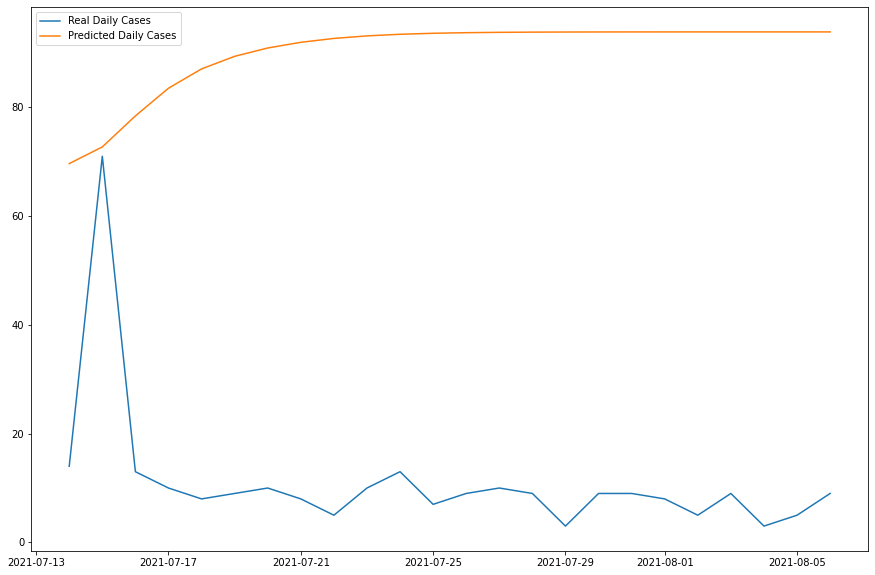

In [ ]:
plt.figure(figsize= (15,10))

plt.plot(
  deathCases.index[len(d_trainData):len(d_trainData) + len(d_true_cases)], 
  d_true_cases,
  label='Real Daily Cases'
)

plt.plot(
  deathCases.index[len(d_trainData):len(d_trainData) + len(d_true_cases)], 
  d_predicted_cases, 
  label='Predicted Daily Cases'
)
print(d_true_cases)
print(d_predicted_cases)
plt.legend();

#Prediction of Future Deseased Cases

In [ ]:
d_scaler = MinMaxScaler()

d_scaler = d_scaler.fit(np.expand_dims(deathCases, axis=1))

d_all_data = d_scaler.transform(np.expand_dims(deathCases, axis=1))

d_all_data.shape

(474, 1)

In [ ]:
d_x_all, d_y_all = createSequence(d_all_data, sequenceLen)

d_x_all = torch.from_numpy(d_x_all).float()
d_y_all = torch.from_numpy(d_y_all).float()

d_model = CoronaVirusPredictor(1,512, seq_len=sequenceLen, num_layers=2)
d_model, d_train_history, _ = train_model(d_model, d_x_all, d_y_all)

Epoch 0 train loss: 44.210792541503906
Epoch 10 train loss: 18.839757919311523
Epoch 20 train loss: 18.881507873535156
Epoch 30 train loss: 18.727161407470703
Epoch 40 train loss: 18.719104766845703
Epoch 50 train loss: 18.779815673828125


In [ ]:

with torch.no_grad():
  d_test_seq = d_x_all[:1]
  d_preds = []
  for _ in range(Days):
    d_y_test_pred = d_model(d_test_seq)
    d_pred = torch.flatten(d_y_test_pred).item()
    d_preds.append(d_pred)
    d_new_seq = d_test_seq.numpy().flatten()
    d_new_seq = np.append(d_new_seq, [d_pred])
    d_new_seq = d_new_seq[1:]
    d_test_seq = torch.as_tensor(d_new_seq).view(1, sequenceLen, 1).float()


In [ ]:
d_predicted_cases = d_scaler.inverse_transform(
  np.expand_dims(d_preds, axis=0)
).flatten()

In [ ]:
deathCases.index[-1]

Timestamp('2021-08-12 00:00:00')

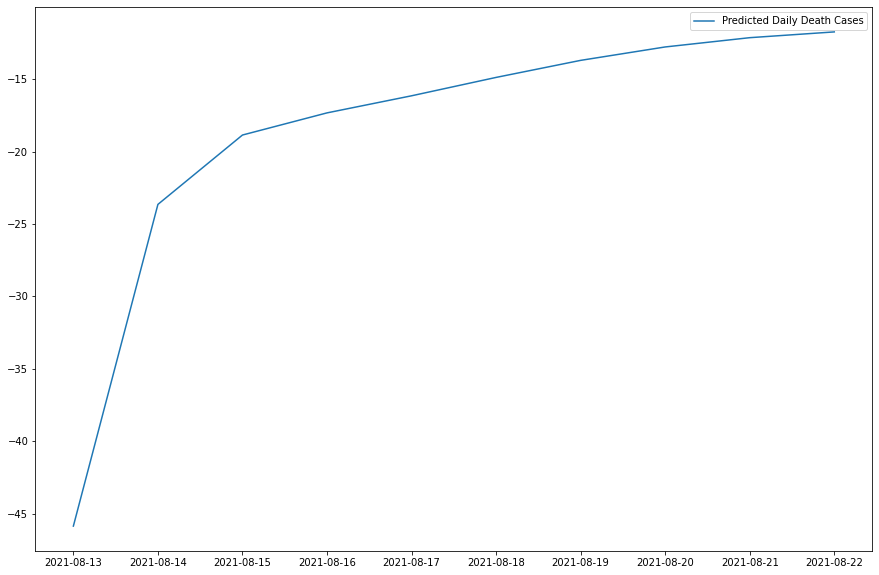

In [ ]:
d_predicted_index = pd.date_range(
  start=deathCases.index[-1],
  periods = Days+1,
  closed ='right'
)

d_predicted_cases = pd.Series(
  data = d_predicted_cases,
  index = d_predicted_index
)
plt.figure(figsize= (15,10))
plt.plot(d_predicted_cases, label='Predicted Daily Death Cases')
plt.legend();

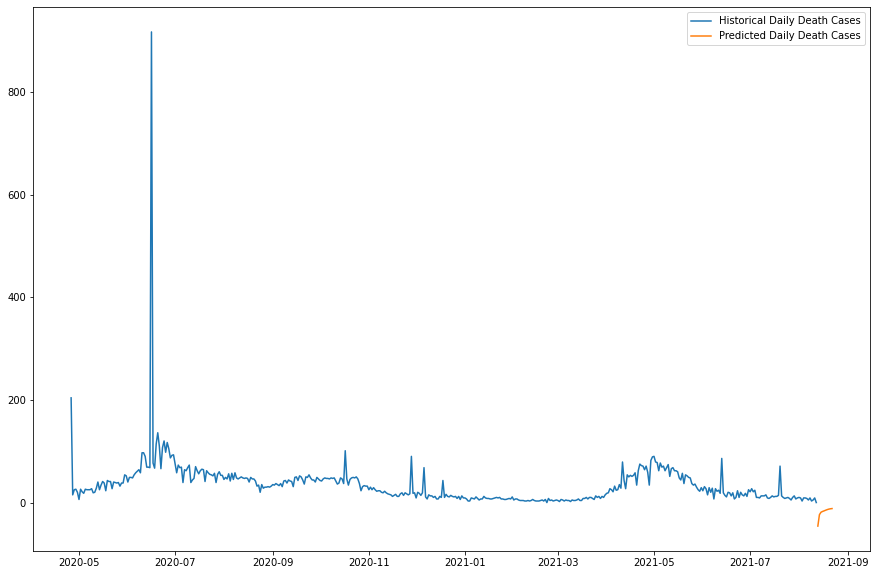

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(deathCases, label='Historical Daily Death Cases')
plt.plot(d_predicted_cases, label='Predicted Daily Death Cases')
plt.legend();

#Recovered Cases Prediction

In [ ]:
recover = stats.copy()
recover.drop(columns=['active','confirmed','deaths'],inplace=True)
recover.head()

,date,recovered
0,2020-04-26,641
1,2020-04-27,711
2,2020-04-28,798
3,2020-04-29,936
4,2020-04-30,1092


In [ ]:
recover['recovered'][recover['date'] == '2021-04-26']

365    544958
Name: recovered, dtype: int64

In [ ]:
index = recover.index
rows = len(index)
print(rows)

474


In [ ]:
recovered_cases = list(recover['recovered'])
recovered = pd.DataFrame(np.empty((0, rows)))
recovered.columns = list(recover['date'])
recovered.loc[0] = recovered_cases
recovered.head()

,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-07-31,2021-08-01,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12
0,641.0,711.0,798.0,936.0,1092.0,1134.0,1203.0,1230.0,1395.0,1605.0,1694.0,1793.0,1867.0,1867.0,2296.0,2366.0,2513.0,2739.0,2944.0,3125.0,3260.0,3498.0,3730.0,4352.0,4702.0,5769.0,6096.0,6381.0,7083.0,7584.0,8013.0,8408.0,8650.0,16008.0,16364.0,16791.0,16985.0,17213.0,17472.0,18096.0,...,694524.0,694706.0,695499.0,696134.0,696664.0,697444.0,697643.0,698317.0,699119.0,700057.0,700185.0,700859.0,701299.0,701994.0,702410.0,703066.0,703370.0,703948.0,704489.0,705093.0,707247.0,708231.0,709013.0,709753.0,710005.0,710368.0,710769.0,711235.0,711355.0,711791.0,712358.0,712668.0,713193.0,713379.0,714015.0,714501.0,714759.0,715090.0,715650.0,715650.0


In [ ]:
recoverCases = recovered.sum(axis=0)
recoverCases.index = pd.to_datetime(recoverCases.index)
recoverCases.head()

2020-04-26     641.0
2020-04-27     711.0
2020-04-28     798.0
2020-04-29     936.0
2020-04-30    1092.0
dtype: float64

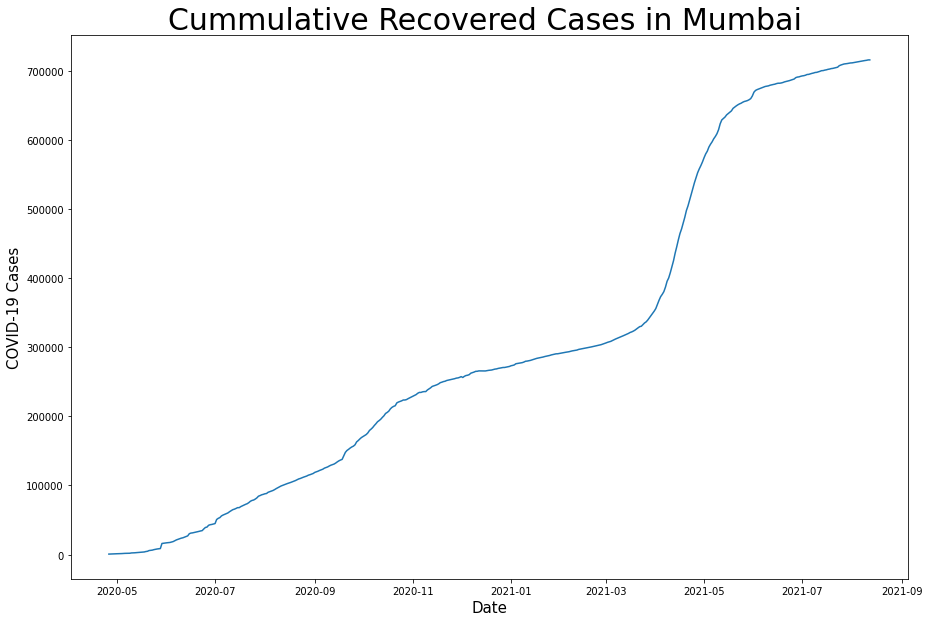

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(recoverCases)
plt.title("Cummulative Recovered Cases in Mumbai ", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.show()

In [ ]:
recoverCases = recoverCases.diff().fillna(recoverCases[0]).astype(np.int64)

num = recoverCases._get_numeric_data()
num[num < 0] = -num
recoverCases.head()

2020-04-26    641
2020-04-27     70
2020-04-28     87
2020-04-29    138
2020-04-30    156
dtype: int64

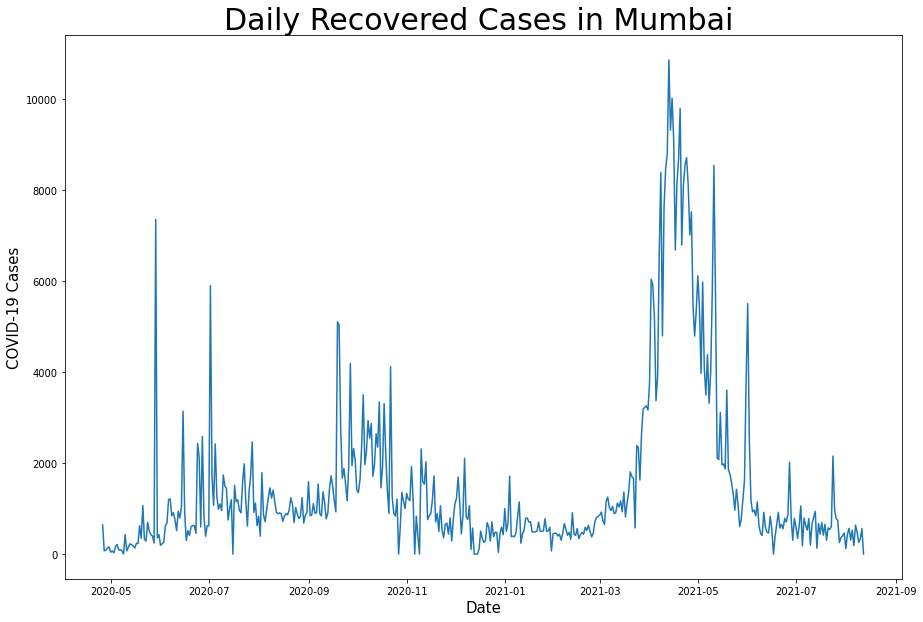

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(recoverCases)
plt.title("Daily Recovered Cases in Mumbai ", fontsize = 30)
plt.ylabel("COVID-19 Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.show()

#Preprossing the Recovered Cases Data

In [ ]:
r_testDataSize = 30

r_trainData = recoverCases[:-r_testDataSize]
r_testData = recoverCases[-r_testDataSize:]

In [ ]:
r_scalar = MinMaxScaler()
r_scalar = r_scalar.fit(np.expand_dims(r_trainData, axis = 1))

r_trainData = r_scalar.transform(np.expand_dims(r_trainData, axis = 1))
r_testData =  r_scalar.transform(np.expand_dims(r_testData, axis = 1))

In [ ]:
r_x_train, r_y_train = createSequence(r_trainData, sequenceLen)
r_x_test, r_y_test = createSequence(r_testData, sequenceLen)

In [ ]:
r_x_train  = torch.from_numpy(r_x_train).float()
r_y_train  = torch.from_numpy(r_y_train).float()

r_x_test  = torch.from_numpy(r_x_test).float()
r_y_test  = torch.from_numpy(r_y_test).float()

#Predictions of Recovered Cases with Real-Time Analysis

In [ ]:
r_model = CoronaVirusPredictor(1, 512, seq_len= sequenceLen, num_layers= 2)

r_model, r_train_history, r_test_history = train_model(r_model, r_x_train, r_y_train, r_x_test, r_y_test)  

Epoch 0 train loss: 45.86614227294922 test loss: 0.15826264023780823
Epoch 10 train loss: 18.74753189086914 test loss: 0.7919222116470337
Epoch 20 train loss: 19.014362335205078 test loss: 0.7480937242507935
Epoch 30 train loss: 18.804779052734375 test loss: 0.8851277232170105
Epoch 40 train loss: 18.846084594726562 test loss: 1.0145790576934814
Epoch 50 train loss: 18.78754425048828 test loss: 1.1278572082519531


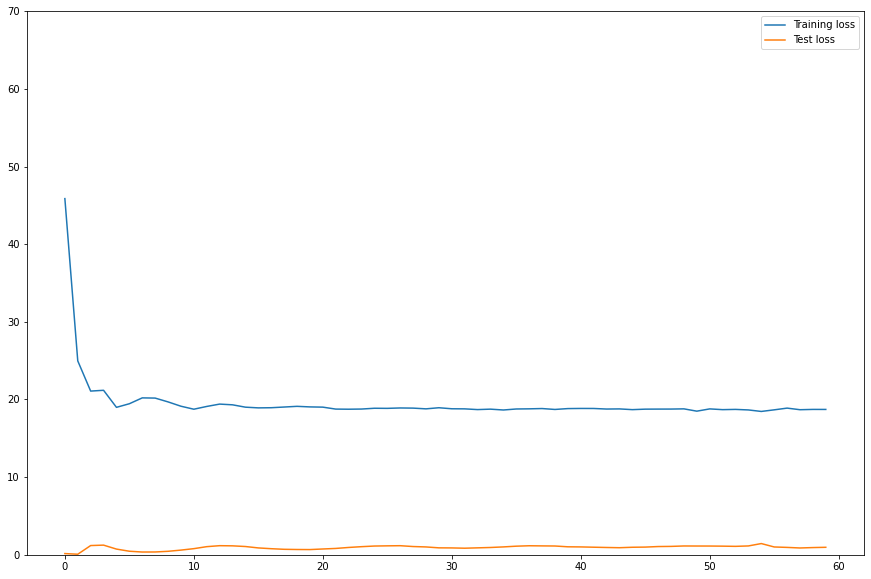

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(r_train_history, label="Training loss")
plt.plot(r_test_history, label="Test loss")
plt.ylim(0, 70)
plt.legend();

In [ ]:
with torch.no_grad():
  r_test_seq = r_x_test[:1]
  r_preds = []
  
  for _ in range(len(r_x_test)):
    r_y_test_pred = r_model(test_seq)
    print(r_y_test_pred)
    
    r_pred = torch.flatten(r_y_test_pred).item()
    r_preds.append(r_pred)
    
    print(r_scalar.inverse_transform(np.expand_dims(r_preds, axis=0)).flatten())
    
    r_new_seq = r_test_seq.numpy().flatten()
    r_new_seq = np.append(r_new_seq, [r_pred])
    r_new_seq = r_new_seq[1:]
    r_test_seq = torch.as_tensor(r_new_seq).view(1, sequenceLen, 1).float()

tensor([[0.2524]])
[2741.53104317]
tensor([[0.2553]])
[2741.53104317 2773.22414738]
tensor([[0.2561]])
[2741.53104317 2773.22414738 2781.35969812]
tensor([[0.2557]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126]
tensor([[0.2549]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627]
tensor([[0.2542]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627
 2760.75213963]
tensor([[0.2536]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627
 2760.75213963 2754.11246586]
tensor([[0.2531]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627
 2760.75213963 2754.11246586 2748.93273693]
tensor([[0.2527]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627
 2760.75213963 2754.11246586 2748.93273693 2744.97081566]
tensor([[0.2524]])
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627
 2760.75213963 2754.11246586 2748.93273693 2744.97081566 2741.96546578]
tensor([[0.2522

In [ ]:
r_true_cases = r_scalar.inverse_transform(
    np.expand_dims(r_y_test.flatten().numpy(), axis=0)
).flatten()

In [ ]:
r_predicted_cases = r_scalar.inverse_transform(
  np.expand_dims(r_preds, axis=0)
).flatten()

[[0.05901307]
 [0.00644449]
 [0.00800957]
 [0.01270484]
 [0.014362  ]
 [0.00386669]
 [0.00635242]
 [0.00248573]
 [0.01519057]
 [0.01933346]
 [0.0081937 ]
 [0.00911434]
 [0.00681274]
 [0.        ]
 [0.03949549]
 [0.00644449]
 [0.01353342]
 [0.02080648]
 [0.01887314]
 [0.0166636 ]
 [0.01242865]
 [0.02191125]
 [0.02135887]
 [0.05726386]
 [0.03222243]
 [0.09823237]
 [0.03010495]
 [0.02623826]
 [0.06462898]
 [0.0461241 ]
 [0.03949549]
 [0.03636531]
 [0.02227951]
 [0.67740748]
 [0.03277481]
 [0.03931136]
 [0.01786043]
 [0.02099061]
 [0.0238446 ]
 [0.05744798]
 [0.0627877 ]
 [0.11038483]
 [0.11167372]
 [0.07751795]
 [0.08387037]
 [0.06914012]
 [0.047413  ]
 [0.08681642]
 [0.07319094]
 [0.09565458]
 [0.28898914]
 [0.08433069]
 [0.02734303]
 [0.04768919]
 [0.03756214]
 [0.05551464]
 [0.05744798]
 [0.05800037]
 [0.04188915]
 [0.22389983]
 [0.19710919]
 [0.05477813]
 [0.23798564]
 [0.07595286]
 [0.03599705]
 [0.05754005]
 [0.05717179]
 [0.54317805]
 [0.15660099]
 [0.09860063]
 [0.22288713]
 [0.11

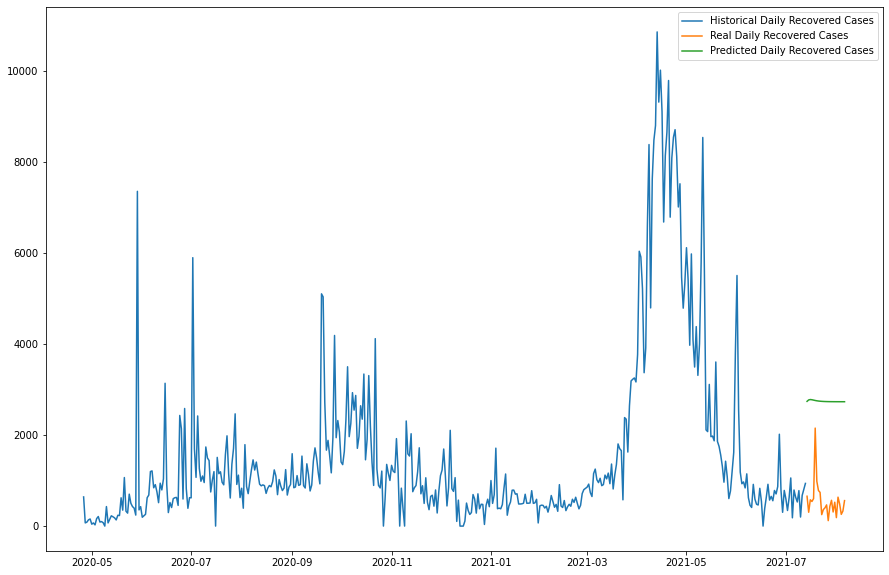

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(
  recoverCases.index[:len(r_trainData)], 
  r_scalar.inverse_transform(r_trainData).flatten(),
  label='Historical Daily Recovered Cases'
)

plt.plot(
  recoverCases.index[len(r_trainData):len(r_trainData) + len(r_true_cases)], 
  r_true_cases,
  label='Real Daily Recovered Cases'
)

plt.plot(
  recoverCases.index[len(r_trainData):len(r_trainData) + len(r_true_cases)], 
  r_predicted_cases, 
  label='Predicted Daily Recovered Cases'
)
print(r_trainData)
print(r_true_cases)
print(r_predicted_cases)
plt.legend();

In [ ]:
r_diff = np.subtract(r_predicted_cases,r_true_cases)
r_diff = np.abs(r_diff)
r_error = np.divide(r_diff,r_true_cases)*100
r_averageError = np.average(r_error)
print("Percentage Error for the Predictions is: " ,r_averageError)
print("Percentage Accuracy for the Predictions is: " ,100-r_averageError)

Percentage Error for the Predictions is:  593.9361582913714
Percentage Accuracy for the Predictions is:  -493.9361582913714


[ 656.       304.       578.       541.       604.      2154.
  984.       782.00006  740.       252.       363.       401.
  466.       120.       435.99997  567.       310.       525.
  186.00002  636.       486.00003  258.       331.       560.     ]
[2741.53104317 2773.22414738 2781.35969812 2776.98925126 2768.78183627
 2760.75213963 2754.11246586 2748.93273693 2744.97081566 2741.96546578
 2739.70077085 2738.00775278 2736.75239444 2735.83046031 2735.15746135
 2734.6693024  2734.31742656 2734.06428313 2733.88365138 2733.75448996
 2733.66287923 2733.59716552 2733.55152202 2733.51850331]


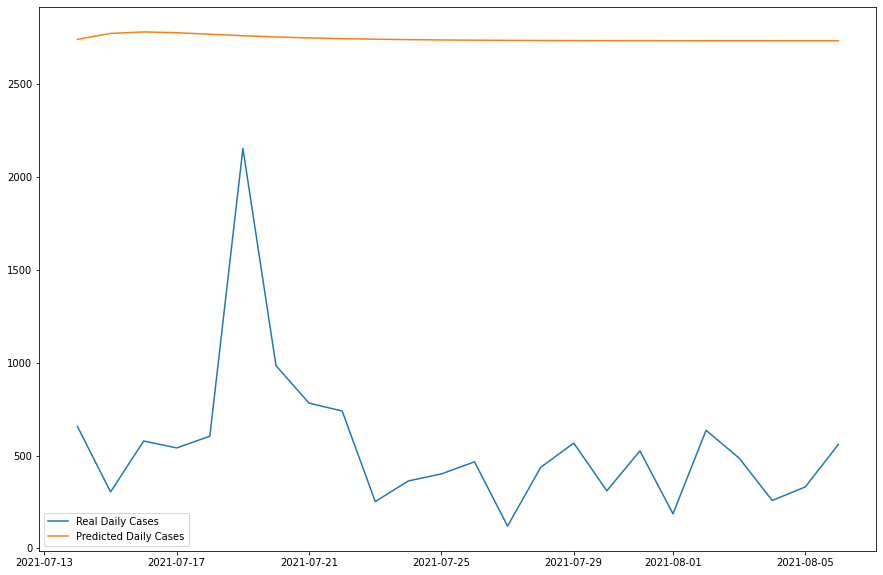

In [ ]:
plt.figure(figsize= (15,10))

plt.plot(
  recoverCases.index[len(r_trainData):len(r_trainData) + len(r_true_cases)], 
  r_true_cases,
  label='Real Daily Cases'
)

plt.plot(
  recoverCases.index[len(r_trainData):len(r_trainData) + len(r_true_cases)], 
  r_predicted_cases, 
  label='Predicted Daily Cases'
)
print(r_true_cases)
print(r_predicted_cases)
plt.legend();

#Prediction for Future Recovered Cases

In [ ]:
r_scaler = MinMaxScaler()

r_scaler = r_scaler.fit(np.expand_dims(recoverCases, axis=1))

r_all_data = r_scaler.transform(np.expand_dims(recoverCases, axis=1))

r_all_data.shape

(474, 1)

In [ ]:
r_x_all, r_y_all = createSequence(r_all_data, sequenceLen)

r_x_all = torch.from_numpy(r_x_all).float()
r_y_all = torch.from_numpy(r_y_all).float()

r_model = CoronaVirusPredictor(1,512, seq_len=sequenceLen, num_layers=2)
r_model, r_train_history, _ = train_model(r_model, r_x_all, r_y_all)

Epoch 0 train loss: 34.41960525512695
Epoch 10 train loss: 19.18682861328125
Epoch 20 train loss: 18.93001937866211
Epoch 30 train loss: 18.87492561340332
Epoch 40 train loss: 18.795654296875
Epoch 50 train loss: 18.671600341796875


In [ ]:

with torch.no_grad():
  r_test_seq = r_x_all[:1]
  r_preds = []
  for _ in range(Days):
    r_y_test_pred = r_model(r_test_seq)
    r_pred = torch.flatten(r_y_test_pred).item()
    r_preds.append(r_pred)
    r_new_seq = r_test_seq.numpy().flatten()
    r_new_seq = np.append(r_new_seq, [pred])
    r_new_seq = r_new_seq[1:]
    r_test_seq = torch.as_tensor(r_new_seq).view(1, sequenceLen, 1).float()


In [ ]:
r_predicted_cases = r_scaler.inverse_transform(
  np.expand_dims(r_preds, axis=0)
).flatten()

In [ ]:
recoverCases.index[-1]

Timestamp('2021-08-12 00:00:00')

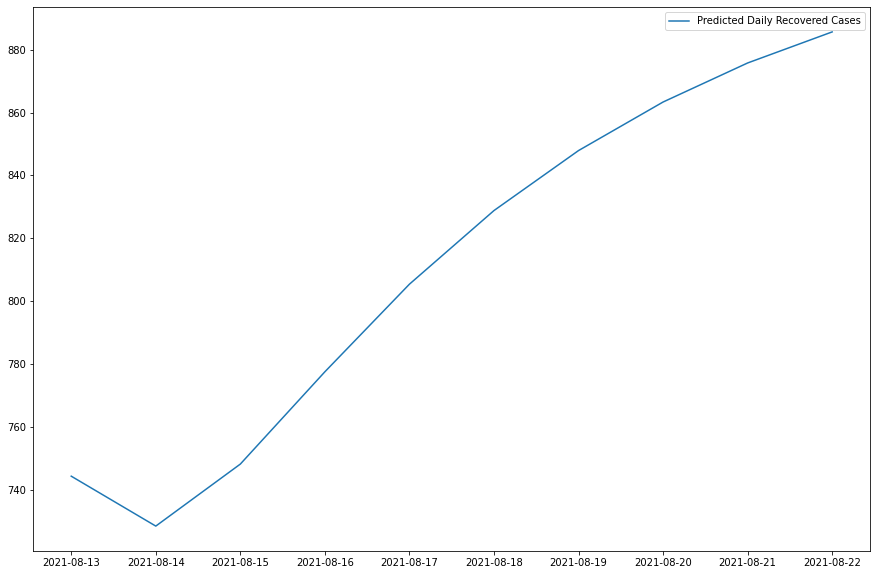

In [ ]:
r_predicted_index = pd.date_range(
  start=recoverCases.index[-1],
  periods = Days+1,
  closed ='right'
)

r_predicted_cases = pd.Series(
  data = r_predicted_cases,
  index = r_predicted_index
)
plt.figure(figsize= (15,10))
plt.plot(r_predicted_cases, label='Predicted Daily Recovered Cases')
plt.legend();

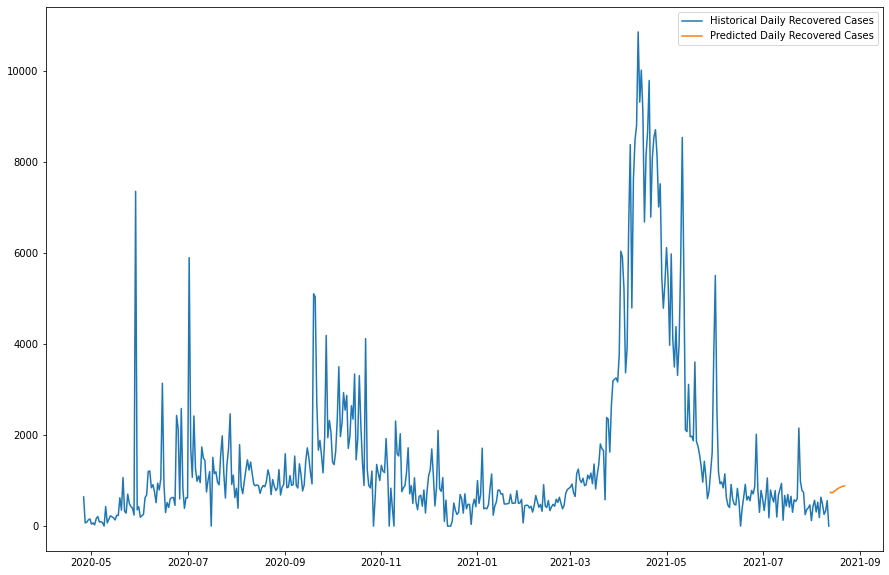

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(recoverCases, label='Historical Daily Recovered Cases')
plt.plot(r_predicted_cases, label='Predicted Daily Recovered Cases')
plt.legend();

#Hospital Beds Prediction

In [ ]:
hosp_rate = 0.25
recoverCases.head()

2020-04-26    641
2020-04-27     70
2020-04-28     87
2020-04-29    138
2020-04-30    156
dtype: int64

In [ ]:
dailyCases.head()

2020-04-26    4562.0
2020-04-27    4846.0
2020-04-28    5127.0
2020-04-29    5438.0
2020-04-30    5679.0
dtype: float64

In [ ]:
hosp_beds = (dailyCases - recoverCases- deathCases)*hosp_rate

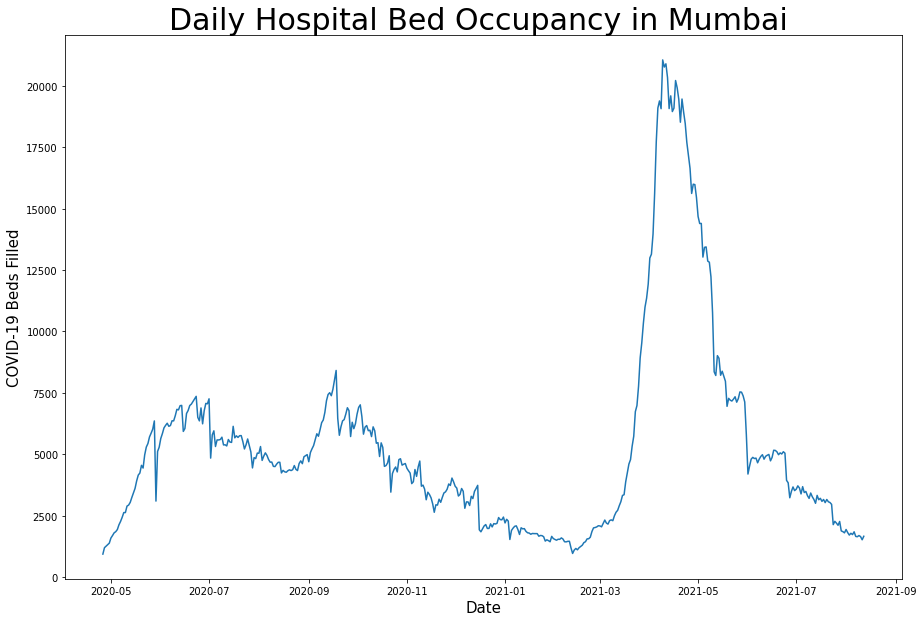

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(hosp_beds)
plt.title("Daily Hospital Bed Occupancy in Mumbai ", fontsize = 30)
plt.ylabel("COVID-19 Beds Filled", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.show()

#Preprocessing the Hospital Beds Data

In [ ]:
h_testDataSize = 30

h_trainData = hosp_beds[:-h_testDataSize]
h_testData = hosp_beds[-h_testDataSize:]

In [ ]:
h_scalar = MinMaxScaler()
h_scalar = h_scalar.fit(np.expand_dims(h_trainData, axis = 1))

h_trainData = h_scalar.transform(np.expand_dims(h_trainData, axis = 1))
h_testData =  h_scalar.transform(np.expand_dims(h_testData, axis = 1))

In [ ]:
h_x_train, h_y_train = createSequence(h_trainData, sequenceLen)
h_x_test, h_y_test = createSequence(h_testData, sequenceLen)

In [ ]:
h_x_train  = torch.from_numpy(h_x_train).float()
h_y_train  = torch.from_numpy(h_y_train).float()

h_x_test  = torch.from_numpy(h_x_test).float()
h_y_test  = torch.from_numpy(h_y_test).float()

#Predictions Of Hospital Beds data with Real-Time Analysis

In [ ]:
h_model = CoronaVirusPredictor(1, 512, seq_len= sequenceLen, num_layers= 2)

h_model, h_train_history, h_test_history = train_model(h_model, h_x_train, h_y_train, h_x_test, h_y_test)  

Epoch 0 train loss: 36.000545501708984 test loss: 0.03407122939825058
Epoch 10 train loss: 18.890125274658203 test loss: 0.6553149819374084
Epoch 20 train loss: 18.945877075195312 test loss: 0.711307168006897
Epoch 30 train loss: 18.83106231689453 test loss: 1.1437801122665405
Epoch 40 train loss: 18.831947326660156 test loss: 1.0846174955368042
Epoch 50 train loss: 420.2412414550781 test loss: 29.655866622924805


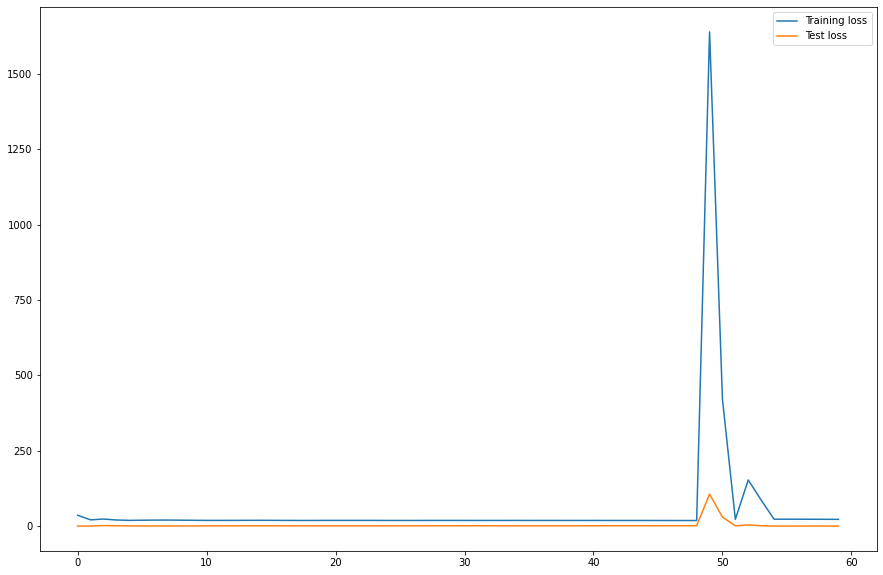

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(h_train_history, label="Training loss")
plt.plot(h_test_history, label="Test loss")
plt.legend();

In [ ]:
with torch.no_grad():
  h_test_seq = h_x_test[:1]
  h_preds = []
  
  for _ in range(len(h_x_test)):
    h_y_test_pred = h_model(test_seq)
    print(h_y_test_pred)
    
    h_pred = torch.flatten(h_y_test_pred).item()
    h_preds.append(h_pred)
    
    print(h_scalar.inverse_transform(np.expand_dims(h_preds, axis=0)).flatten())
    
    h_new_seq = h_test_seq.numpy().flatten()
    h_new_seq = np.append(h_new_seq, [h_pred])
    h_new_seq = h_new_seq[1:]
    h_test_seq = torch.as_tensor(h_new_seq).view(1, sequenceLen, 1).float()

tensor([[0.1412]])
[3772.05703193]
tensor([[0.1428]])
[3772.05703193 3804.13074961]
tensor([[0.1435]])
[3772.05703193 3804.13074961 3819.15791587]
tensor([[0.1437]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666]
tensor([[0.1435]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356]
tensor([[0.1431]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356
 3811.04526848]
tensor([[0.1427]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356
 3811.04526848 3803.1177564 ]
tensor([[0.1424]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356
 3811.04526848 3803.1177564  3796.29685539]
tensor([[0.1421]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356
 3811.04526848 3803.1177564  3796.29685539 3791.09986413]
tensor([[0.1419]])
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356
 3811.04526848 3803.1177564  3796.29685539 3791.09986413 3787.46497081]
tensor([[0.1418

In [ ]:
h_true_cases = h_scalar.inverse_transform(
    np.expand_dims(h_y_test.flatten().numpy(), axis=0)
).flatten()

In [ ]:
h_predicted_cases = h_scalar.inverse_transform(
  np.expand_dims(h_preds, axis=0)
).flatten()

[[0.        ]
 [0.01296154]
 [0.01611502]
 [0.01933057]
 [0.02217366]
 [0.03249075]
 [0.03751893]
 [0.04298165]
 [0.04536538]
 [0.04966106]
 [0.05930772]
 [0.06608646]
 [0.07445435]
 [0.08397686]
 [0.08405135]
 [0.09708738]
 [0.09914831]
 [0.10464828]
 [0.11454324]
 [0.12364363]
 [0.13291784]
 [0.14805204]
 [0.15985896]
 [0.16403049]
 [0.17961165]
 [0.17411169]
 [0.20081692]
 [0.21658431]
 [0.22363618]
 [0.23720607]
 [0.2447173 ]
 [0.25288655]
 [0.26944851]
 [0.10724307]
 [0.20763291]
 [0.21627393]
 [0.23395327]
 [0.24384824]
 [0.25548134]
 [0.26048469]
 [0.26481762]
 [0.25856033]
 [0.2601619 ]
 [0.2697589 ]
 [0.26954784]
 [0.27997666]
 [0.29291337]
 [0.29182082]
 [0.30032528]
 [0.30085914]
 [0.24823082]
 [0.25414049]
 [0.2844834 ]
 [0.29059171]
 [0.300586  ]
 [0.30349117]
 [0.30882974]
 [0.31429245]
 [0.3192089 ]
 [0.27669903]
 [0.26954784]
 [0.29576888]
 [0.26360092]
 [0.29033099]
 [0.30488168]
 [0.30413677]
 [0.31423038]
 [0.19422442]
 [0.2412162 ]
 [0.24939786]
 [0.21768927]
 [0.23

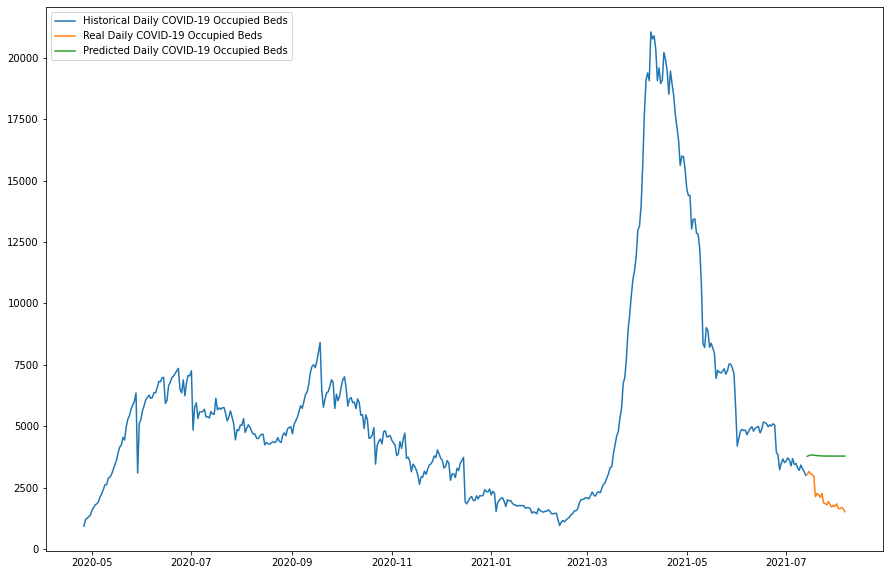

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(
  hosp_beds.index[:len(h_trainData)], 
  h_scalar.inverse_transform(h_trainData).flatten(),
  label='Historical Daily COVID-19 Occupied Beds'
)

plt.plot(
  hosp_beds.index[len(h_trainData):len(h_trainData) + len(h_true_cases)], 
  h_true_cases,
  label='Real Daily COVID-19 Occupied Beds'
)

plt.plot(
  hosp_beds.index[len(h_trainData):len(h_trainData) + len(h_true_cases)], 
  h_predicted_cases, 
  label='Predicted Daily COVID-19 Occupied Beds'
)
print(h_trainData)
print(h_true_cases)
print(h_predicted_cases)
plt.legend();

In [ ]:
h_diff = np.subtract(h_predicted_cases,h_true_cases)
h_error = np.divide(h_diff,h_true_cases)*100
h_averageError = np.average(h_error)
print("Percentage Error for the Predictions is: " ,h_averageError)
print("Percentage Accuracy for the Predictions is: " ,100-h_averageError)

Percentage Error for the Predictions is:  89.23227728613381
Percentage Accuracy for the Predictions is:  10.767722713866192


In [ ]:
h_square = np.square(h_diff)
h_mse = np.sum(h_square)/np.count_nonzero(h_square)
h_rmse = np.sqrt(h_mse)
print("Mean square error: ",h_mse)
print("Root mean square error: ", h_rmse)

h_abs = np.abs(h_diff)
h_mae = np.sum(h_abs)/np.count_nonzero(h_abs)
print("Mean absolute error: ", h_mae)

h_avg = np.average(h_true_cases)
h_mdiff = np.subtract(h_true_cases,h_avg)
h_msq = np.square(h_mdiff)
h_rsq = 1 - (np.sum(h_square)/np.sum(h_msq))
print("R Squared: ",h_rsq)

Mean square error:  3091814.0284662857
Root mean square error:  1758.355489787627
Mean absolute error:  1682.659968443215
R Squared:  -10.42992070187934


[3027.25   3155.     3060.75   3030.25   2955.25   2129.25   2264.
 2191.75   2102.75   2258.75   1873.75   1844.25   1795.     1930.7499
 1805.5    1704.5    1777.25   1724.2499 1837.4999 1648.5    1637.4999
 1685.25   1642.25   1513.    ]
[3772.05703193 3804.13074961 3819.15791587 3822.56986666 3818.51669356
 3811.04526848 3803.1177564  3796.29685539 3791.09986413 3787.46497081
 3785.09391856 3783.64044133 3782.80028108 3782.34179363 3782.10354818
 3781.98352529 3781.92111339 3781.8845064  3781.85810137 3781.83589713
 3781.81609336 3781.79808992 3781.78338712 3781.77108477]


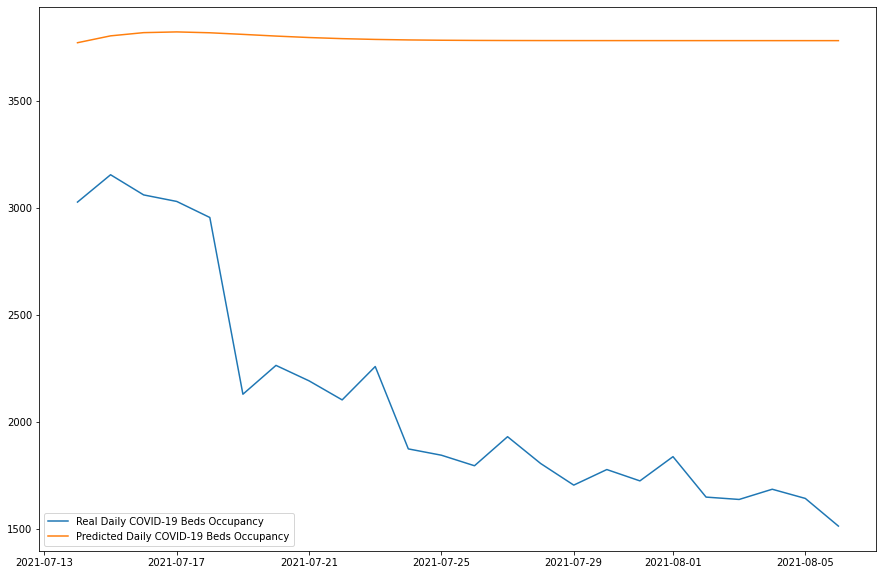

In [ ]:
plt.figure(figsize= (15,10))

plt.plot(
  hosp_beds.index[len(h_trainData):len(h_trainData) + len(h_true_cases)], 
  h_true_cases,
  label='Real Daily COVID-19 Beds Occupancy'
)

plt.plot(
  hosp_beds.index[len(h_trainData):len(h_trainData) + len(h_true_cases)], 
  h_predicted_cases, 
  label='Predicted Daily COVID-19 Beds Occupancy'
)
print(h_true_cases)
print(h_predicted_cases)
plt.legend();

#Prediction for Future Hospital Beds Occupancy

In [ ]:
h_scaler = MinMaxScaler()

h_scaler = h_scaler.fit(np.expand_dims(hosp_beds, axis=1))

h_all_data = h_scaler.transform(np.expand_dims(hosp_beds, axis=1))

h_all_data.shape

(474, 1)

In [ ]:
h_x_all, h_y_all = createSequence(h_all_data, sequenceLen)

h_x_all = torch.from_numpy(h_x_all).float()
h_y_all = torch.from_numpy(h_y_all).float()

h_model = CoronaVirusPredictor(1,512, seq_len=sequenceLen, num_layers=2)
h_model,h_train_history, _ = train_model(h_model, h_x_all, h_y_all)

Epoch 0 train loss: 35.33805847167969
Epoch 10 train loss: 19.10333824157715
Epoch 20 train loss: 19.02187728881836
Epoch 30 train loss: 18.953163146972656
Epoch 40 train loss: 18.753381729125977
Epoch 50 train loss: 18.627426147460938


In [ ]:
Days = 5
with torch.no_grad():
  h_test_seq = h_x_all[:1]
  h_preds = []
  for _ in range(Days):
    h_y_test_pred = h_model(h_test_seq)
    h_pred = torch.flatten(h_y_test_pred).item()
    h_preds.append(h_pred)
    h_new_seq = h_test_seq.numpy().flatten()
    h_new_seq = np.append(h_new_seq, [pred])
    h_new_seq = h_new_seq[1:]
    h_test_seq = torch.as_tensor(h_new_seq).view(1, sequenceLen, 1).float()


In [ ]:
h_predicted_cases = h_scaler.inverse_transform(
  np.expand_dims(h_preds, axis=0)
).flatten()

In [ ]:
hosp_beds.index[-1]

Timestamp('2021-08-12 00:00:00')

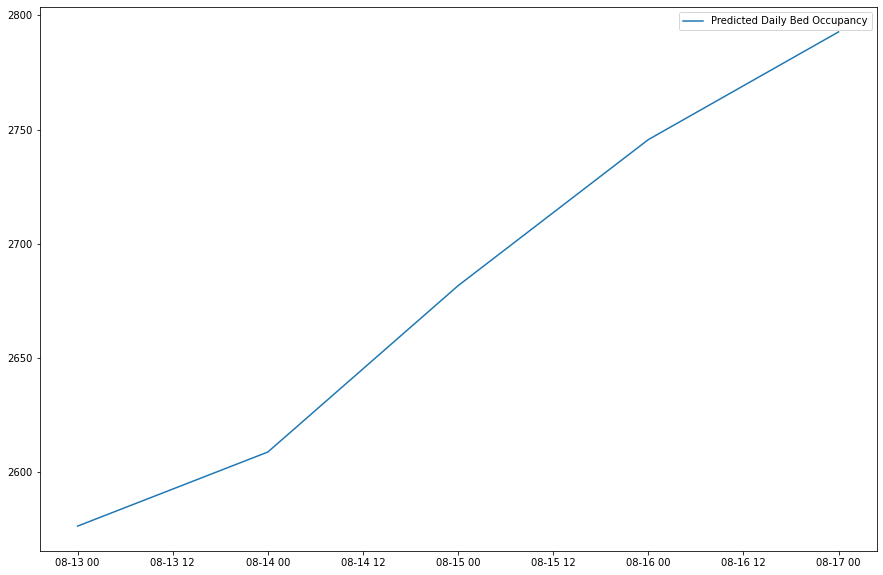

In [ ]:
h_predicted_index = pd.date_range(
  start=hosp_beds.index[-1],
  periods = Days+1,
  closed ='right'
)

h_predicted_cases = pd.Series(
  data = h_predicted_cases,
  index = h_predicted_index
)
plt.figure(figsize= (15,10))
plt.plot(h_predicted_cases, label='Predicted Daily Bed Occupancy')
plt.legend();


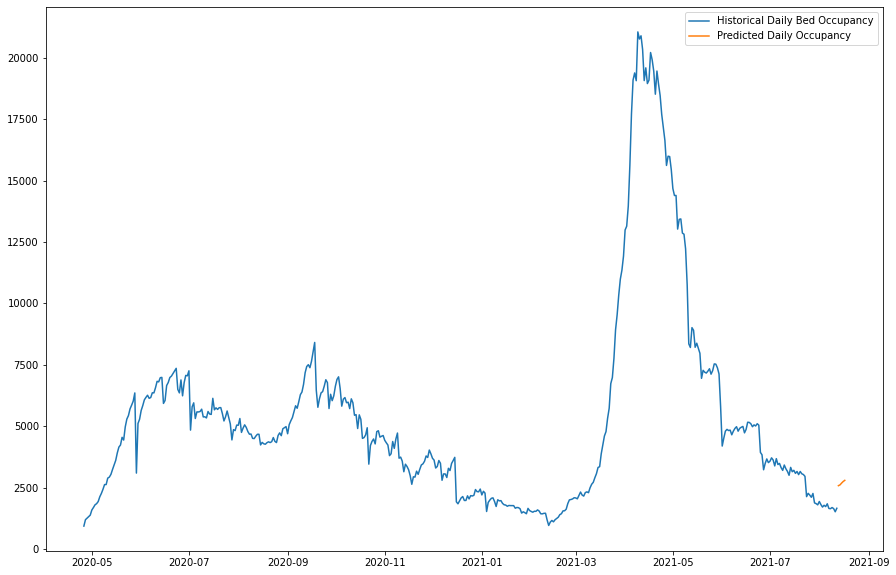

In [ ]:
plt.figure(figsize= (15,10))
plt.plot(hosp_beds, label='Historical Daily Bed Occupancy')
plt.plot(h_predicted_cases, label='Predicted Daily Occupancy')
plt.legend();

#Web App

In [ ]:
pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

anvil.server.connect("TNV3X75VTFTFUQD3FLQXGRZZ-RXWKY5T52FFLKJAN")

In [ ]:
@anvil.server.callable

def casesOverview():
   cases = [[total_deaths, total_active, total_confirmed, total_recovered], [m_total_deaths, m_total_active, m_total_confirmed, m_total_recovered]]
   return cases



In [ ]:
@anvil.server.callable

def casesPredicted():
  a_preds = predicted_cases.to_list()
  d_preds = d_predicted_cases.to_list()
  r_preds = r_predicted_cases.to_list()
  
  a_preds = [int(i) for i in a_preds]
  d_preds = [int(i) for i in d_preds]
  r_preds = [int(i) for i in r_preds]
  return [a_preds, d_preds, r_preds]

In [ ]:
@anvil.server.callable

def casesHospital():
  h_preds = h_predicted_cases.to_list()
  h_preds = [int(i) for i in h_preds]

  return h_preds

In [ ]:
@anvil.server.callable

def warningHospital():
  count = 0
  for pred in h_preds:
    if pred >= (0.85*26000):
      count += 1
  
  if count != 0:
    return True
  else:
    return False